In [20]:
from mse_2D_C import mse_2D, mse_2D_one_image
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Imágenes

In [2]:
list_mse = []
list_images = []
list_areas = []

In [3]:
folder_path = r'datos\2D\imagenes_prueba'

### Redimensionamos todas las imágenes a 100x100

In [13]:
for filename in os.listdir(folder_path):
    try:
        file_path = os.path.join(folder_path, filename)
        image = io.imread(file_path)
        image_resized = transform.resize(image, (100, 100), anti_aliasing=True)
        
        path_save = r'datos\2D\imagenes_redimensionadas\{}'.format(filename)
        io.imsave(path_save, image_resized)
    
    except AttributeError as error:
        print(error)
        continue


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

'NoneType' object has no attribute 'ReadAsArray'


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### I- Calculamos las MSE (con Fuzzy Entropy) para cada imagen redimensionada:

In [14]:
folder_path = r'datos\2D\imagenes_redimensionadas'

In [15]:
scales = 12
m = 1
r = 0.5

In [16]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    mse_values = mse_2D_one_image(file_path, scales, m, r)
    area = np.trapz(mse_values, dx=1)

    list_mse.append(mse_values)
    list_images.append(filename)
    list_areas.append(area)

### Graficamos las MSE para cada imagen y su respectiva imagen redimensionada

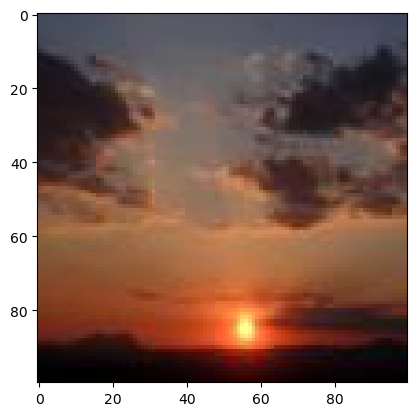

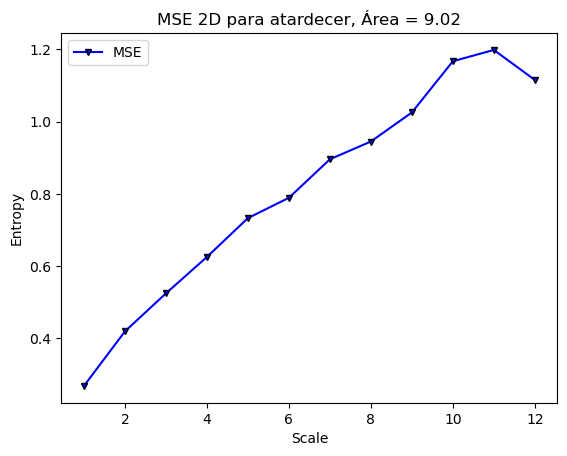

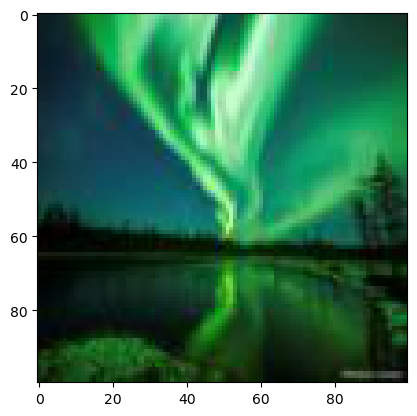

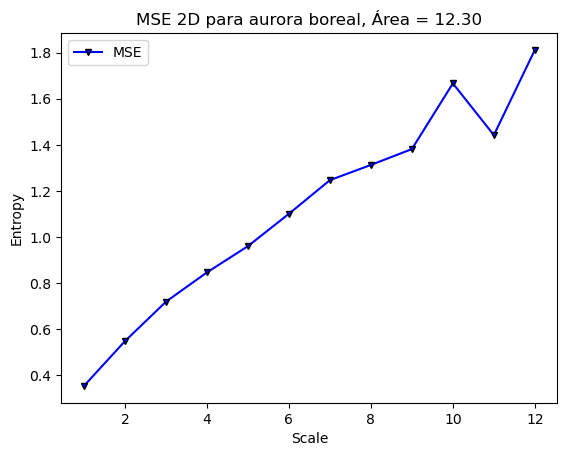

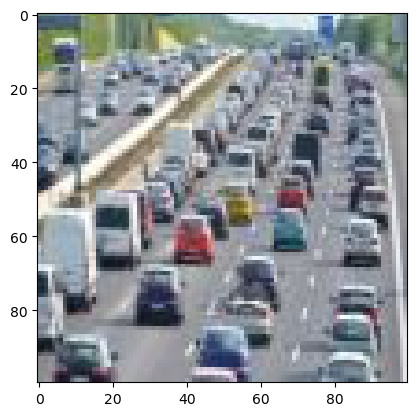

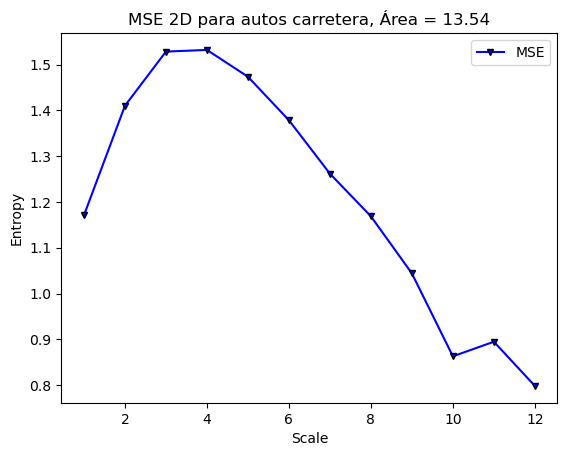

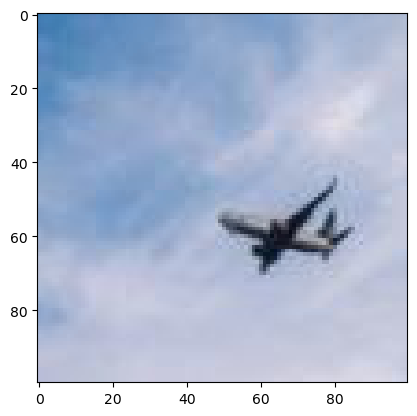

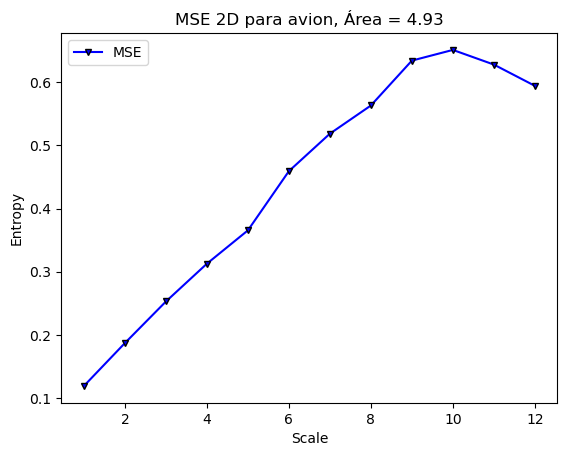

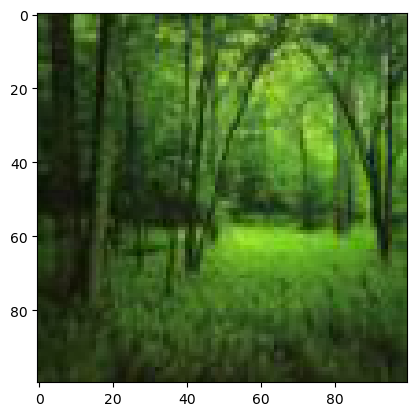

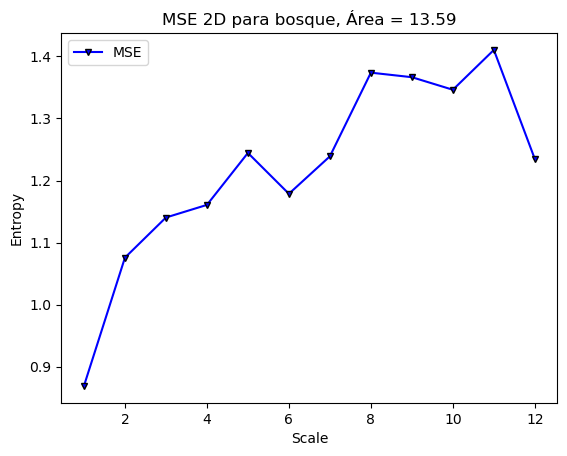

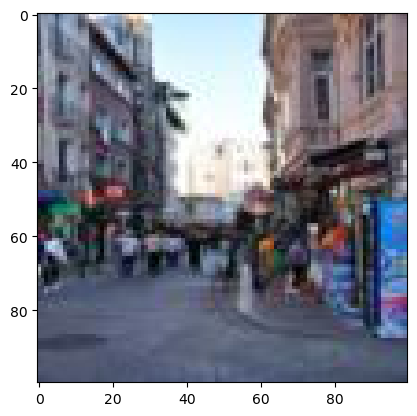

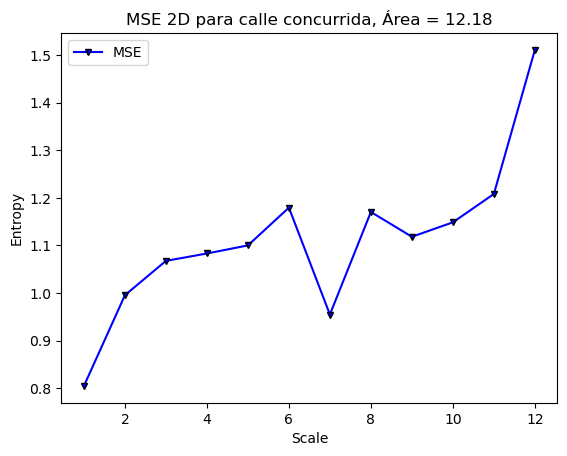

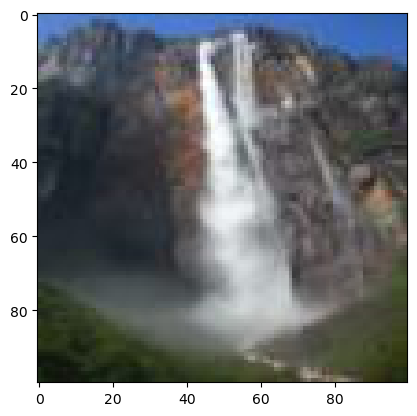

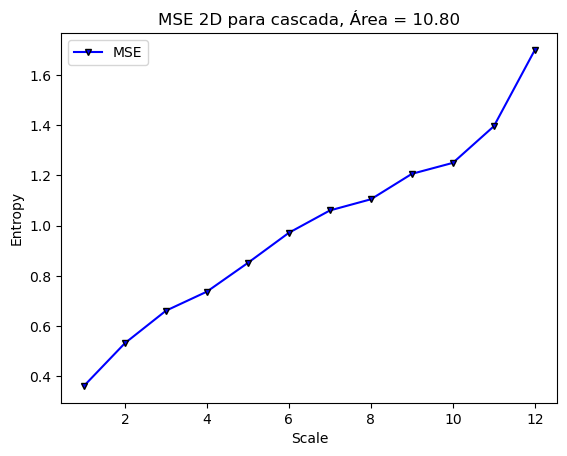

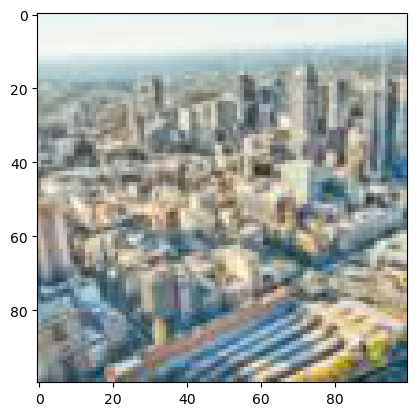

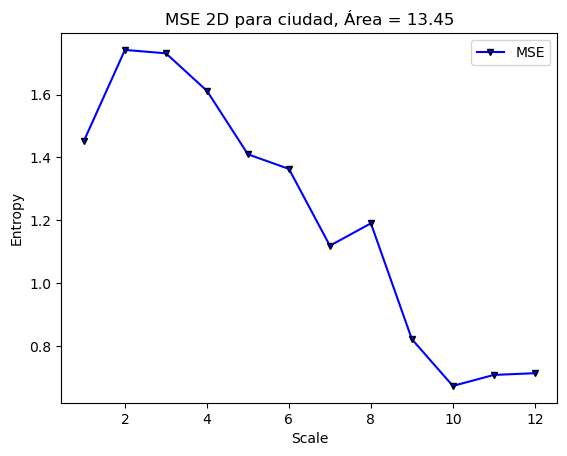

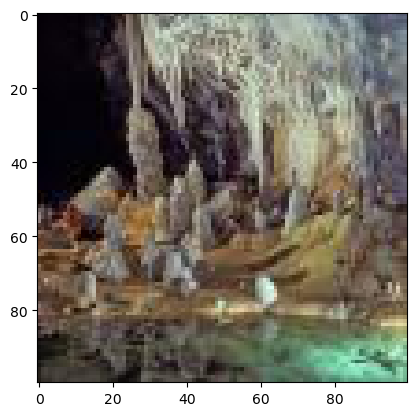

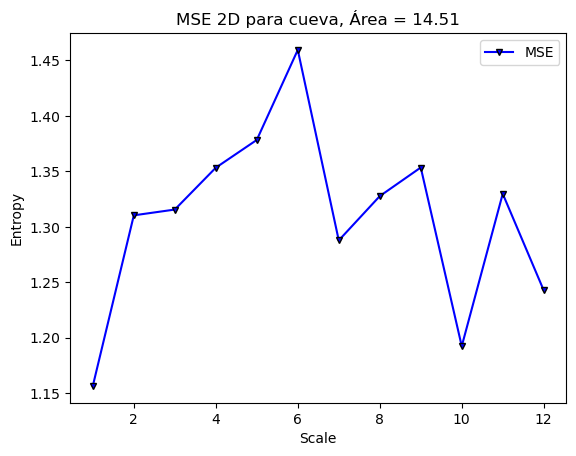

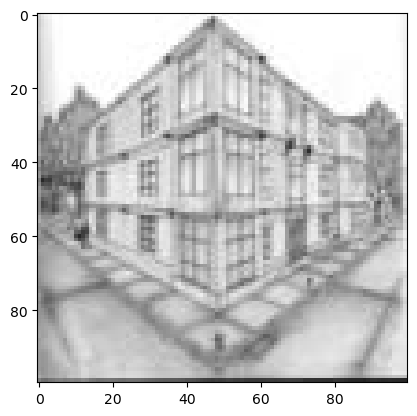

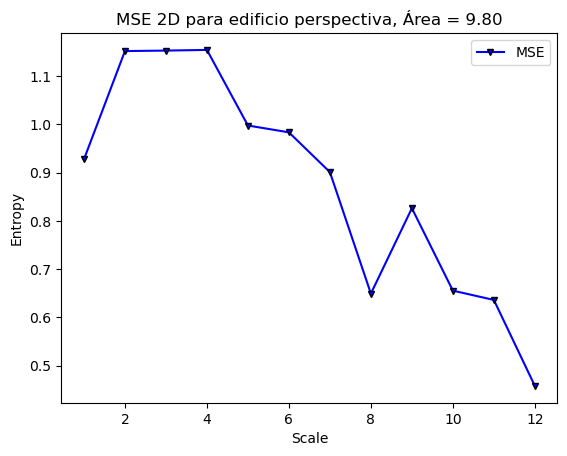

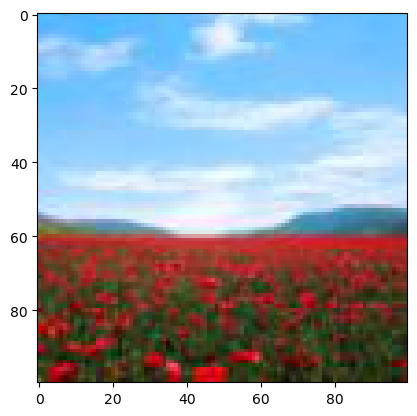

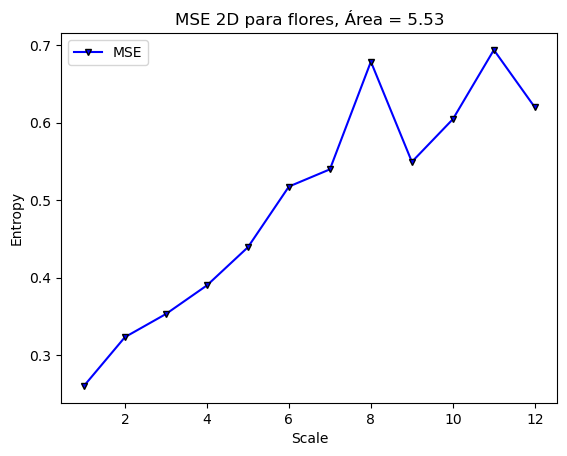

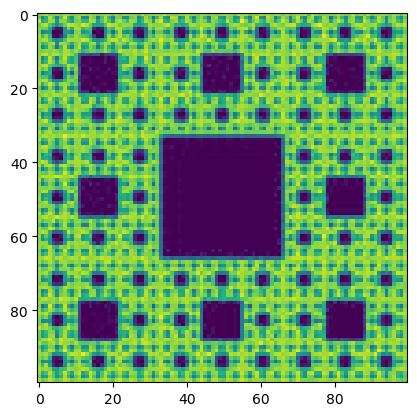

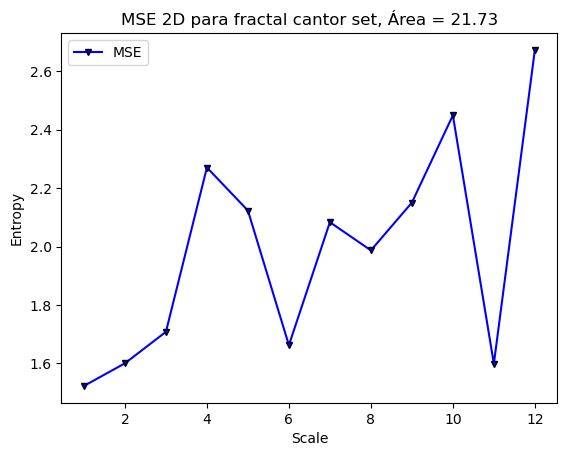

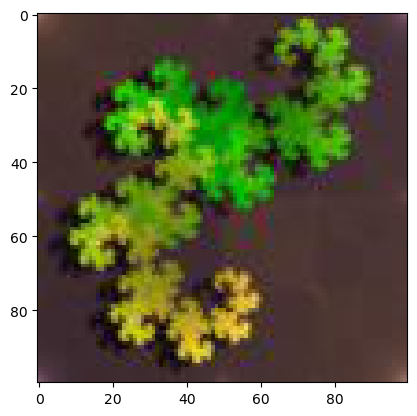

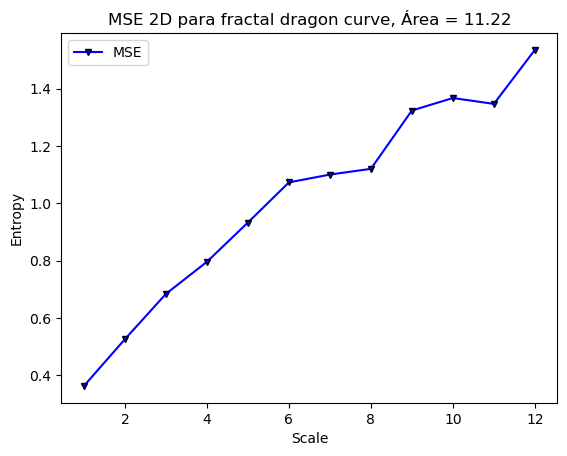

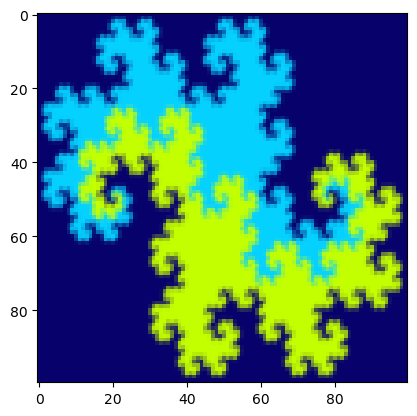

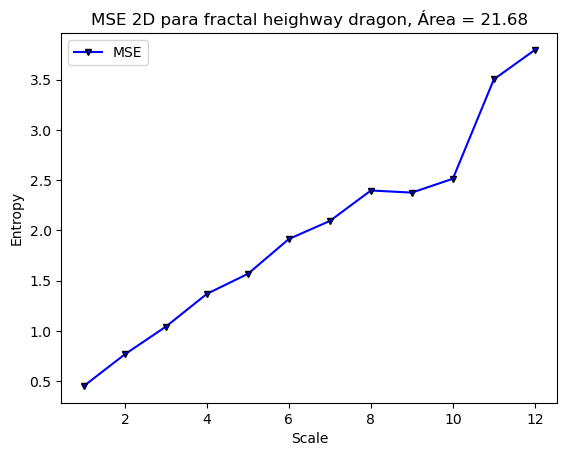

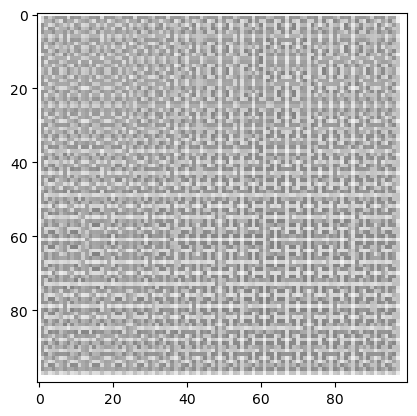

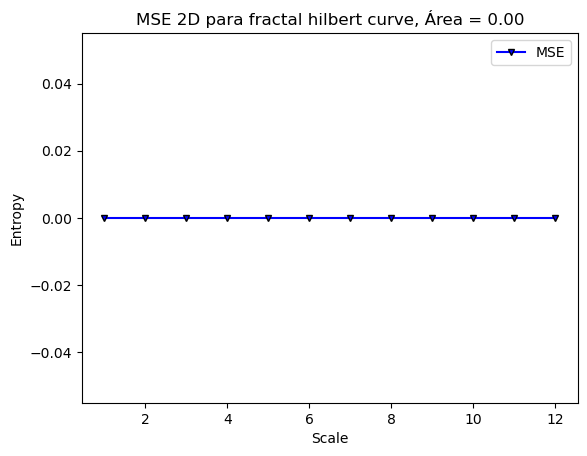

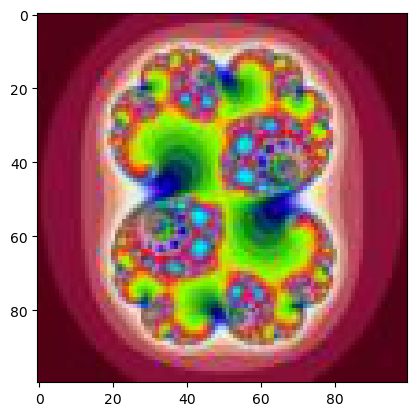

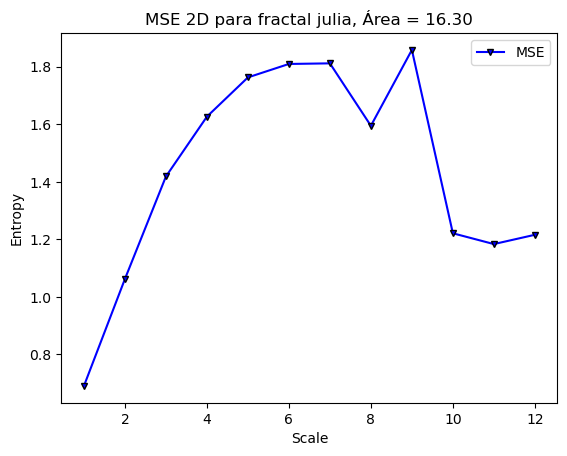

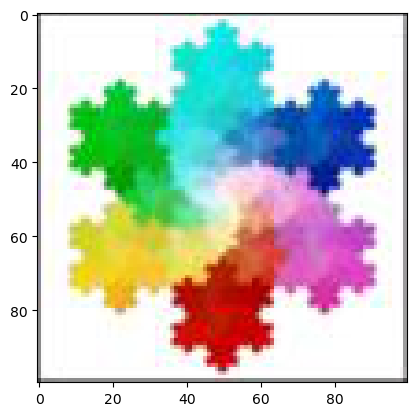

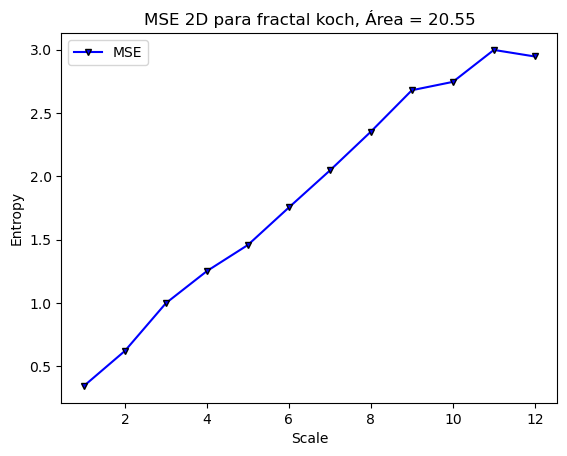

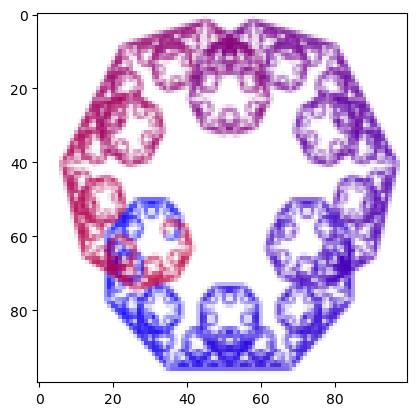

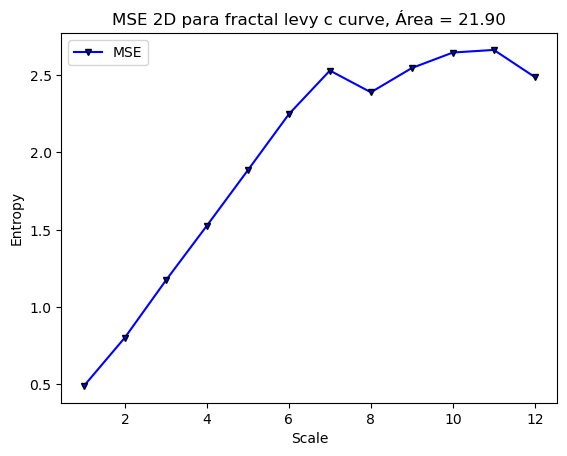

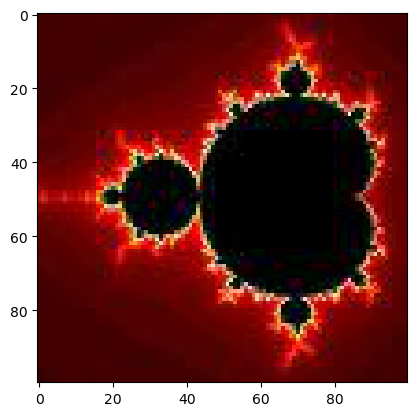

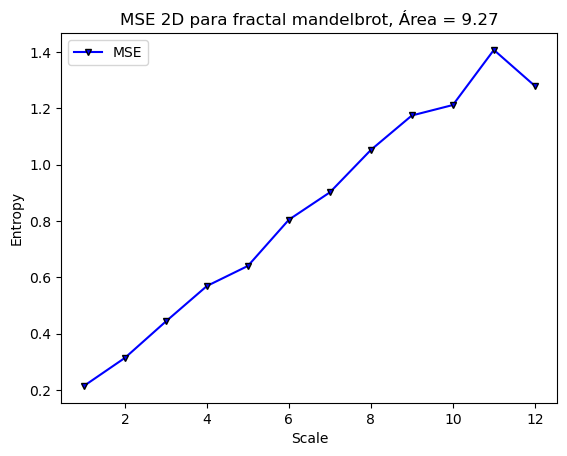

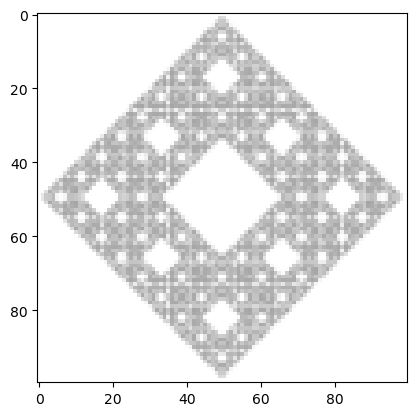

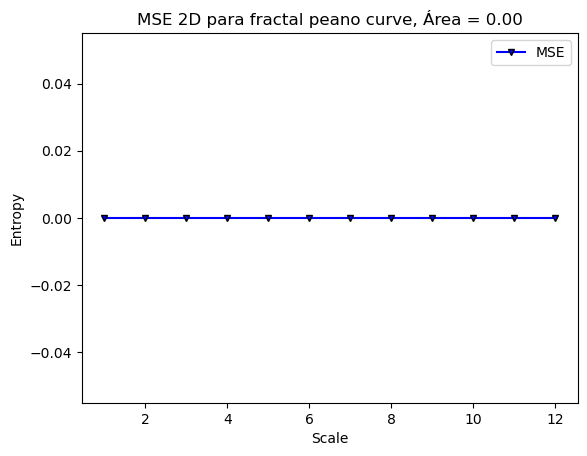

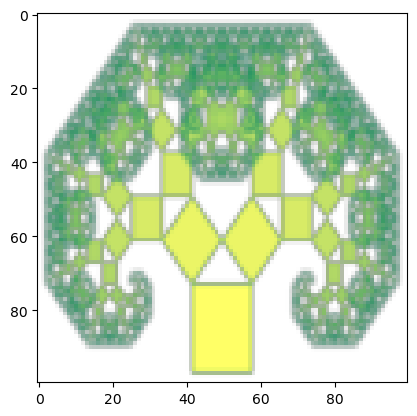

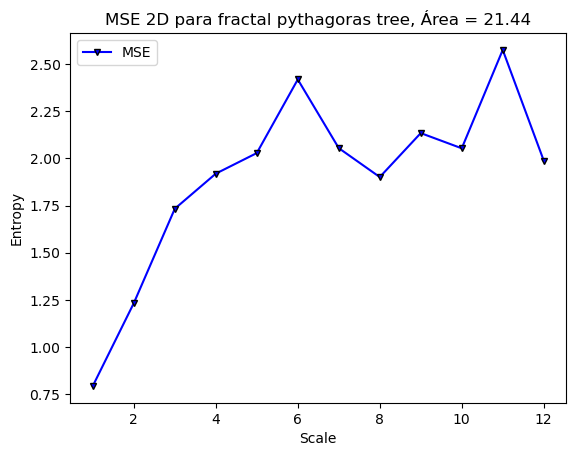

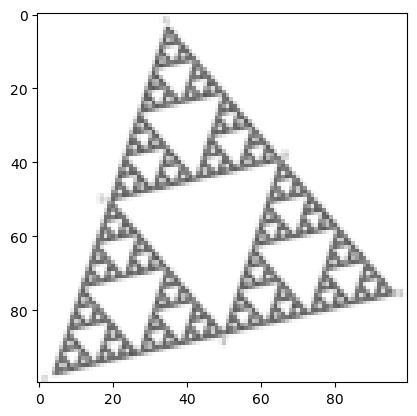

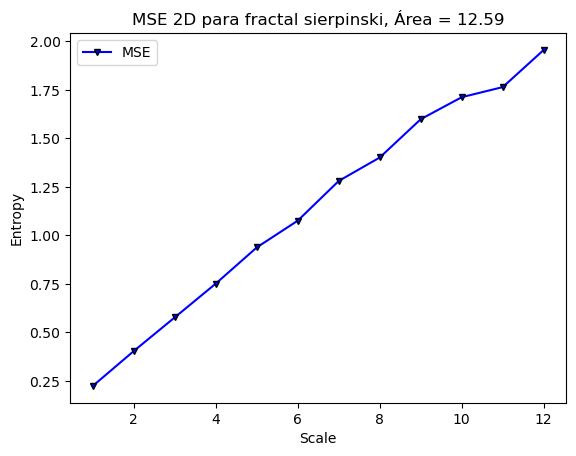

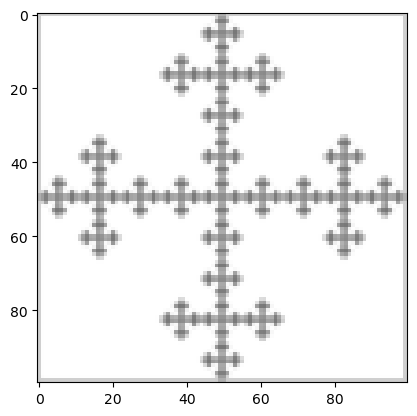

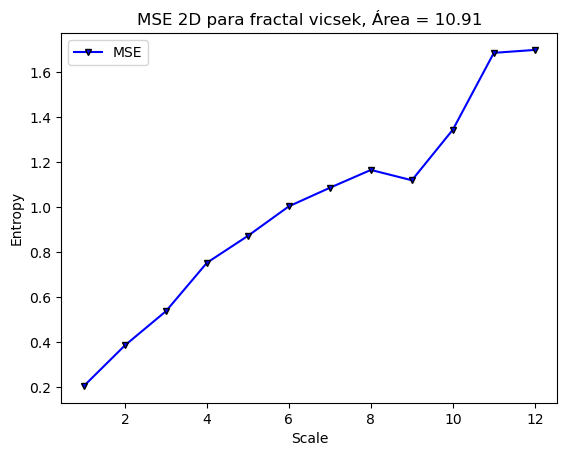

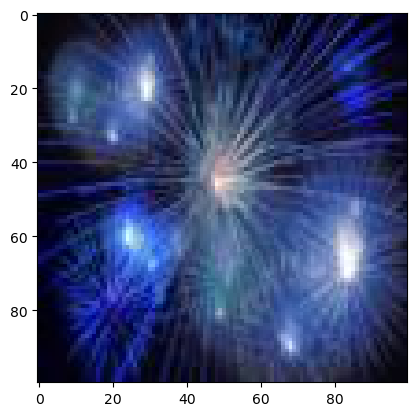

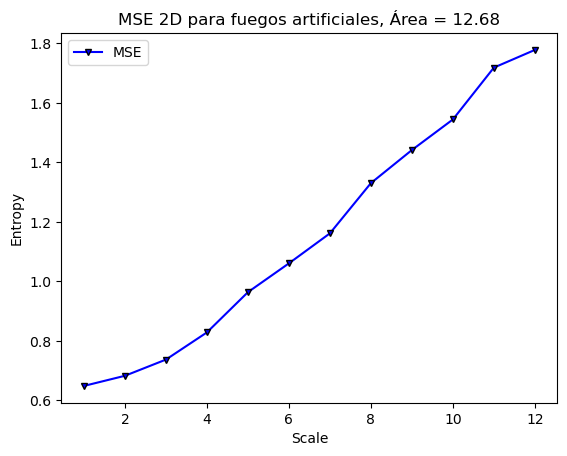

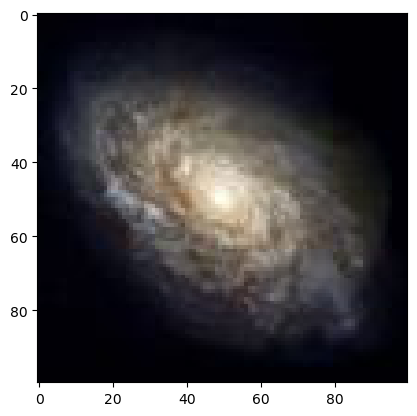

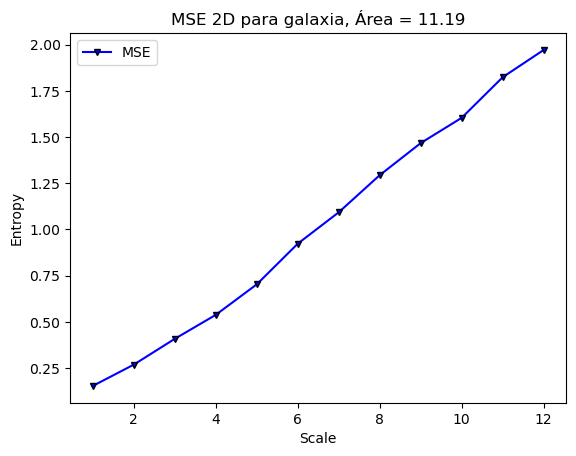

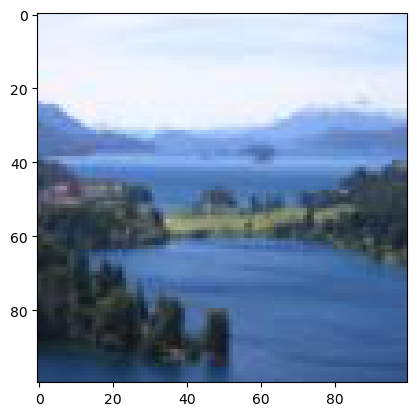

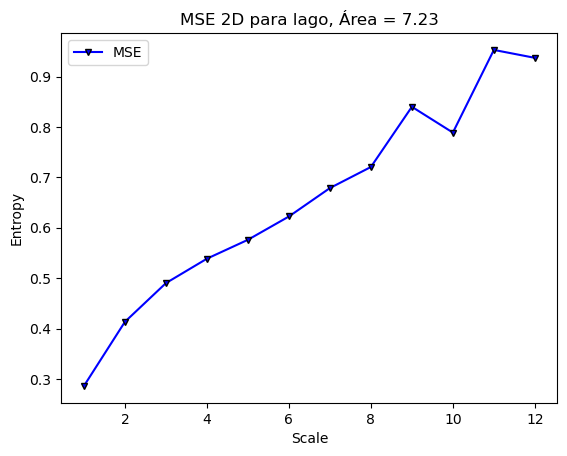

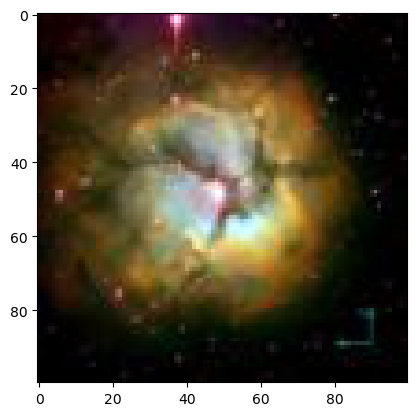

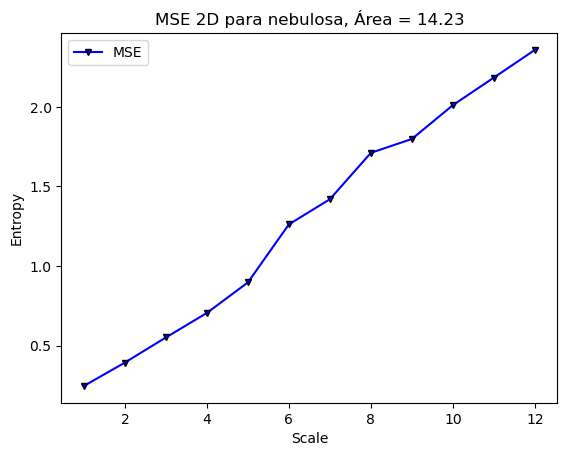

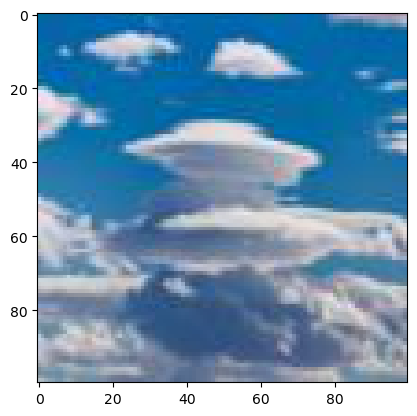

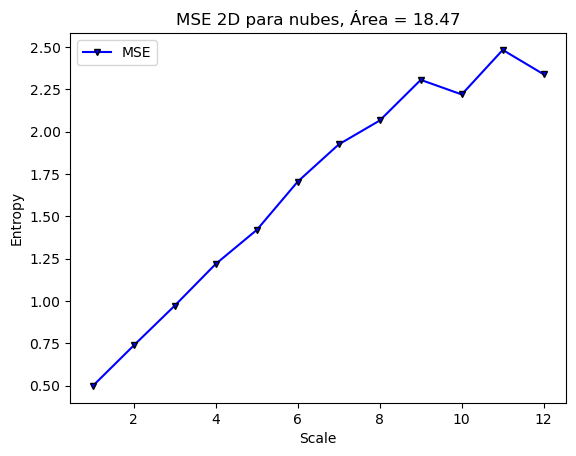

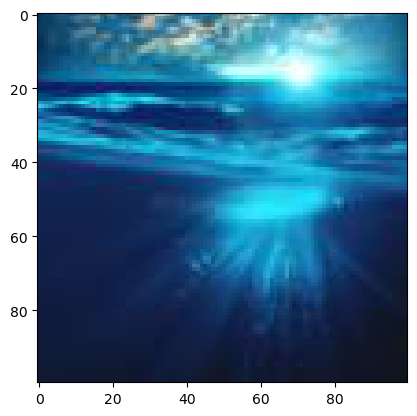

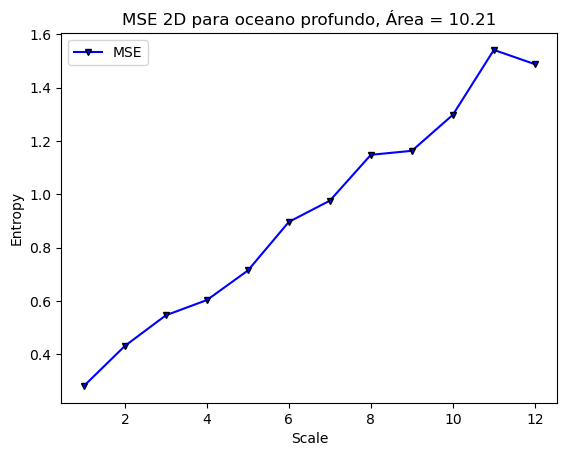

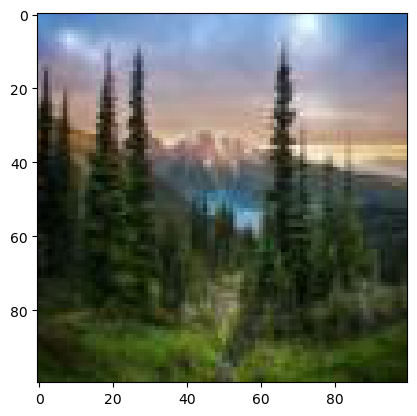

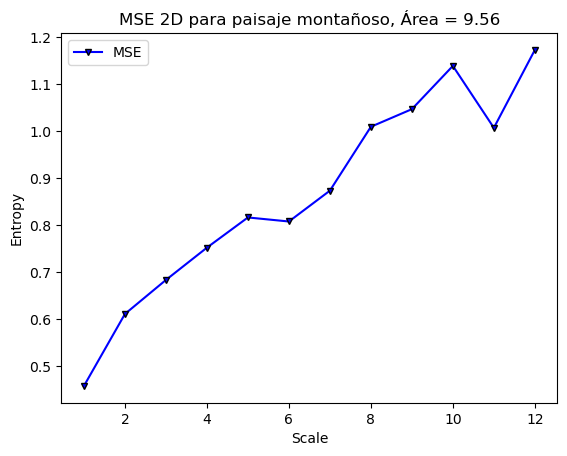

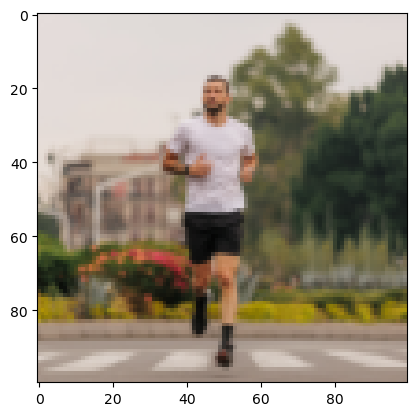

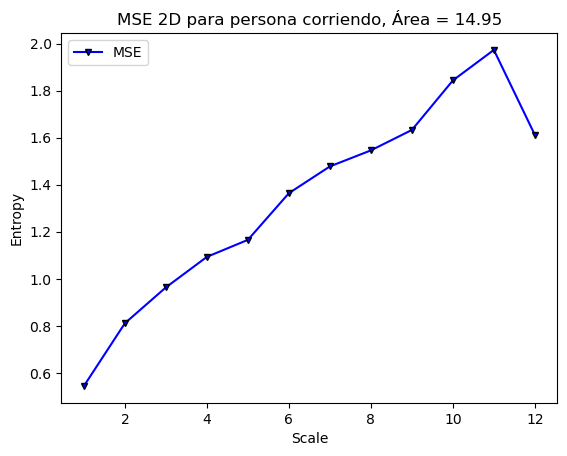

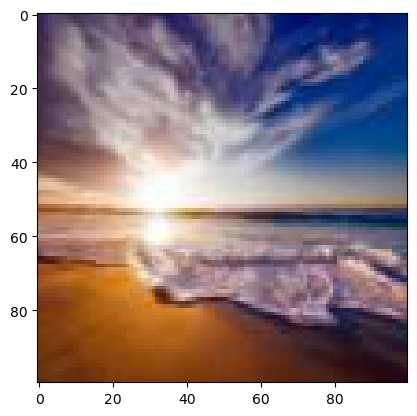

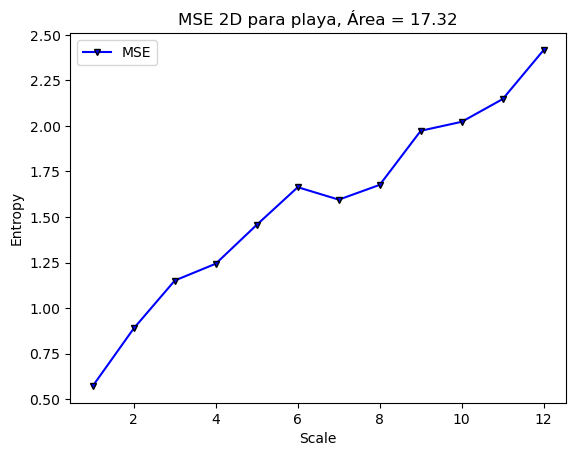

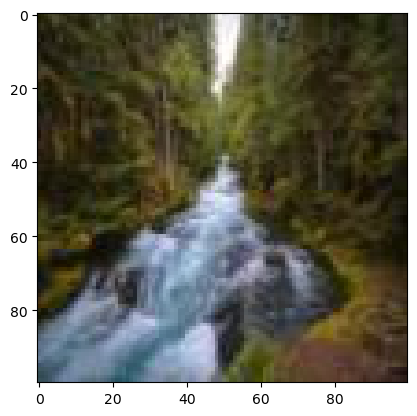

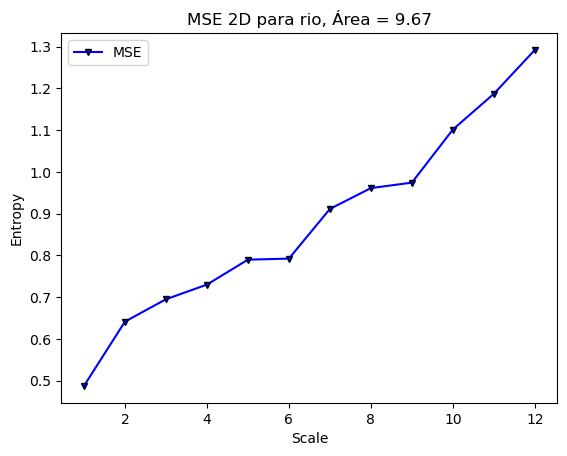

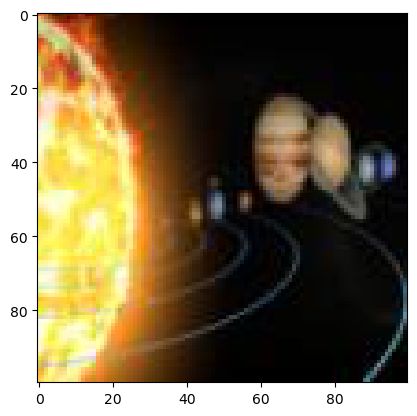

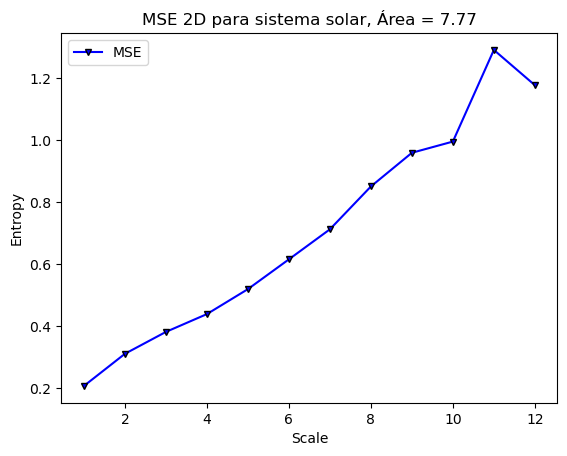

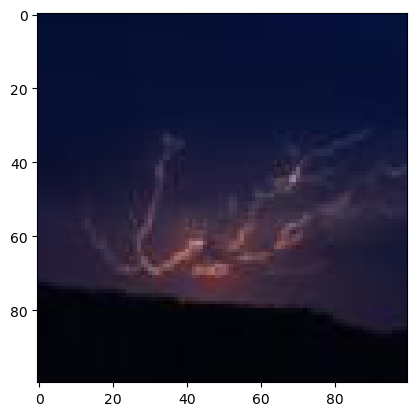

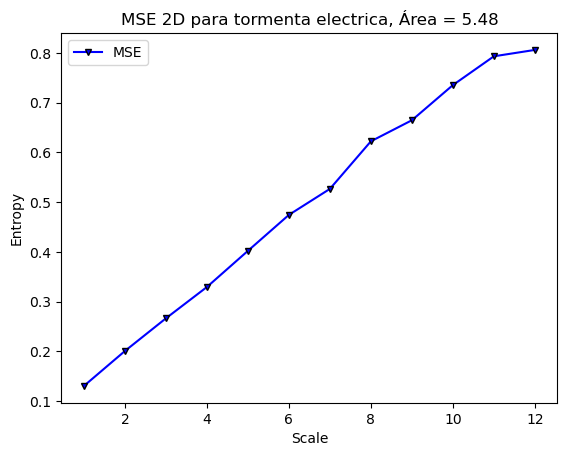

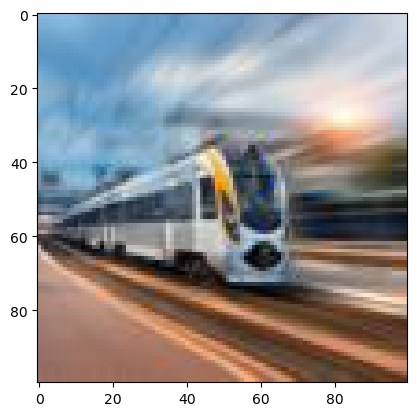

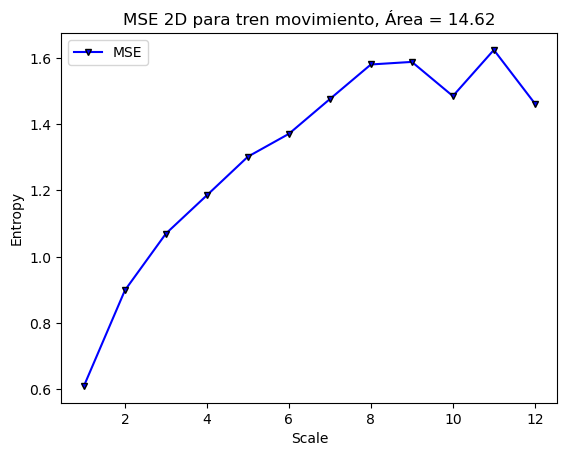

In [19]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    area = list_areas[list_images.index(filename)]
    mse_values = list_mse[list_images.index(filename)]
    
    plt.imshow(image)
    plt.show()

    plt.plot(range(1, len(mse_values) + 1), mse_values, color='blue', marker='v', markersize=5, markeredgecolor='black', label='MSE')

    name_title = filename.replace('.jpg', '')
    name_title = name_title.replace('.png', '')
    name_title = name_title.replace('.jpeg', '')
    name_title = name_title.replace('_', ' ')
    plt.title(f'MSE 2D para {name_title}, Área = {area:.2f}')

    plt.xlabel('Scale')
    plt.ylabel('Entropy')
    plt.legend()
    plt.show()

### Hacemos un dataframe con las MSE de cada imagen.

In [26]:
data_dict = {'Image': list_images, 'Area': list_areas, '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

for i in range(len(list_mse)):
    for j in range(len(list_mse[i])):
        data_dict[str(j + 1)].append(list_mse[i][j])

df_mse_values = pd.DataFrame(data_dict)
df_mse_values.to_csv(r'datos\2D\mse_values.csv', index=False)
df_mse_values

Image       Area         1         2         3  \
0                atardecer.jpeg   9.017207  0.268638  0.419549  0.524872   
1             aurora_boreal.jpg  12.301116  0.352179  0.546601  0.718065   
2           autos_carretera.jpg  13.539035  1.170835  1.410025  1.528175   
3                     avion.jpg   4.930046  0.118990  0.186960  0.252771   
4                    bosque.jpg  13.588165  0.869050  1.075745  1.140424   
5          calle_concurrida.jpg  12.184150  0.804677  0.995472  1.067623   
6                   cascada.jpg  10.801863  0.361695  0.531985  0.661202   
7                    ciudad.jpg  13.451794  1.452699  1.742141  1.731331   
8                     cueva.jpg  14.507803  1.156528  1.310354  1.315567   
9      edificio_perspectiva.jpg   9.801997  0.927669  1.152040  1.153070   
10                   flores.jpg   5.530265  0.260256  0.323245  0.353110   
11       fractal_cantor_set.jpg  21.729776  1.522930  1.600347  1.707998   
12     fractal_dragon_curve.jpg  11.222463  0.363603  0.526678  0.684442   
13  fractal_heighway_dragon.png  21.678659  0.454081  0.769100  1.044116   
14    fractal_hilbert_curve.png   0.000000 -0.000000 -0.000000 -0.000000   
15            fractal_julia.jpg  16.302594  0.690789  1.062531  1.418546   
16             fractal_koch.jpg  20.545763  0.343008  0.620032  0.997216   
17     fractal_levy_c_curve.png  21.902515  0.490007  0.803127  1.173152   
18       fractal_mandelbrot.jpg   9.268371  0.214457  0.314101  0.443653   
19      fractal_peano_curve.png   0.000000 -0.000000 -0.000000 -0.000000   
20  fractal_pythagoras_tree.png  21.442935  0.793339  1.232586  1.733245   
21       fractal_sierpinski.png  12.590615  0.223730  0.403606  0.577141   
22           fractal_vicsek.png  10.906118  0.204589  0.385104  0.536974   
23      fuegos_artificiales.jpg  12.680492  0.648610  0.682686  0.737098   
24                  galaxia.jpg  11.187866  0.153605  0.268906  0.408491   
25                     lago.jpg   7.233274  0.286088  0.413354  0.490149   
26                 nebulosa.jpg  14.233321  0.246102  0.393080  0.550839   
27                    nubes.jpg  18.468581  0.498451  0.737761  0.972742   
28          oceano_profundo.jpg  10.205694  0.281436  0.431608  0.546461   
29        paisaje_montañoso.jpg   9.556346  0.457193  0.610389  0.682817   
30        persona_corriendo.png  14.949848  0.544887  0.811491  0.963814   
31                    playa.jpg  17.315745  0.572765  0.888968  1.151430   
32                      rio.jpg   9.672622  0.487107  0.641148  0.694760   
33            sistema_solar.jpg   7.771146  0.207485  0.311222  0.381804   
34       tormenta_electrica.jpg   5.482103  0.130198  0.200476  0.266166   
35          tren_movimiento.jpg  14.616661  0.610614  0.899116  1.070057   

           4         5         6         7         8         9        10  \
0   0.625588  0.733166  0.789342  0.895940  0.945157  1.025561  1.167321   
1   0.845371  0.959541  1.100128  1.246315  1.312460  1.381384  1.666830   
2   1.531844  1.473300  1.378373  1.261782  1.168704  1.044054  0.863135   
3   0.312705  0.365511  0.459336  0.518677  0.563330  0.634448  0.651389   
4   1.160764  1.244499  1.178673  1.239045  1.373856  1.366543  1.346298   
5   1.083119  1.100124  1.179506  0.954823  1.170433  1.118303  1.148602   
6   0.737233  0.851737  0.971592  1.060513  1.104930  1.206246  1.249948   
7   1.611893  1.409872  1.363379  1.118865  1.190176  0.821222  0.672524   
8   1.353312  1.378359  1.459521  1.287762  1.327681  1.353486  1.192348   
9   1.154434  0.997748  0.983587  0.901147  0.649278  0.826279  0.655441   
10  0.390032  0.439293  0.517640  0.539844  0.678850  0.549534  0.604627   
11  2.270253  2.122912  1.662449  2.083196  1.986820  2.150208  2.448978   
12  0.796432  0.933284  1.073224  1.100456  1.120514  1.323813  1.367385   
13  1.369984  1.568630  1.915403  2.094904  2.397534  2.376545  2.514540   
14 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 

### Rankeamos las imágenes según una función de pesos, y según su área:

#### 1) Función de pesos:

In [27]:
def image_score(entropy_list, weights):
    scale_entropy = np.array(entropy_list)
    mean_entropy = np.mean(scale_entropy)
    entropy_at_scale_10 = scale_entropy[9]
    entropy_variation = np.max(scale_entropy) - np.min(scale_entropy)
    entropy_stability = np.sum(np.abs(scale_entropy - np.mean(scale_entropy))) / np.sum(scale_entropy)
    
    score = (weights[0] * mean_entropy) + (weights[1] * entropy_at_scale_10) + (weights[2] * entropy_variation) + (weights[3] * entropy_stability)
    
    return score

In [28]:
weights = [0.35, 0.15, 0.25, 0.25]
df_score = pd.DataFrame(columns=['Image', 'Score'])
count = 0

for entropy_values_image in list_mse:
    score = image_score(entropy_values_image, weights)
    df_score.loc[count] = [list_images[count], score]
    count += 1

df_score.to_csv(r'datos\2D\score.csv', index=False)
df_score

<ipython-input-27-1a9dc64d508b>:6: RuntimeWarning: invalid value encountered in double_scalars
  entropy_stability = np.sum(np.abs(scale_entropy - np.mean(scale_entropy))) / np.sum(scale_entropy)
<ipython-input-27-1a9dc64d508b>:6: RuntimeWarning: invalid value encountered in double_scalars
  entropy_stability = np.sum(np.abs(scale_entropy - np.mean(scale_entropy))) / np.sum(scale_entropy)


Image     Score
0                atardecer.jpeg  0.767701
1             aurora_boreal.jpg  1.086462
2           autos_carretera.jpg  0.781910
3                     avion.jpg  0.476356
4                    bosque.jpg  0.787372
5          calle_concurrida.jpg  0.762977
6                   cascada.jpg  0.943207
7                    ciudad.jpg  0.862525
8                     cueva.jpg  0.724081
9      edificio_perspectiva.jpg  0.633219
10                   flores.jpg  0.433710
11       fractal_cantor_set.jpg  1.388280
12     fractal_dragon_curve.jpg  0.925574
13  fractal_heighway_dragon.png  2.007236
14    fractal_hilbert_curve.png       NaN
15            fractal_julia.jpg  1.031529
16             fractal_koch.jpg  1.828262
17     fractal_levy_c_curve.png  1.705283
18       fractal_mandelbrot.jpg  0.873080
19      fractal_peano_curve.png       NaN
20  fractal_pythagoras_tree.png  1.462315
21       fractal_sierpinski.png  1.193692
22           fractal_vicsek.png  1.013672
23      fuegos_artificiales.jpg  0.992020
24                  galaxia.jpg  1.180171
25                     lago.jpg  0.577310
26                 nebulosa.jpg  1.402248
27                    nubes.jpg  1.495288
28          oceano_profundo.jpg  0.926660
29        paisaje_montañoso.jpg  0.703242
30        persona_corriendo.png  1.166483
31                    playa.jpg  1.380255
32                      rio.jpg  0.728851
33            sistema_solar.jpg  0.770986
34       tormenta_electrica.jpg  0.551371
35          tren_movimiento.jpg  0.979059

In [29]:
best_images = df_score.sort_values(by='Score', ascending=False).head(5)
best_images

Image     Score
13  fractal_heighway_dragon.png  2.007236
16             fractal_koch.jpg  1.828262
17     fractal_levy_c_curve.png  1.705283
27                    nubes.jpg  1.495288
20  fractal_pythagoras_tree.png  1.462315

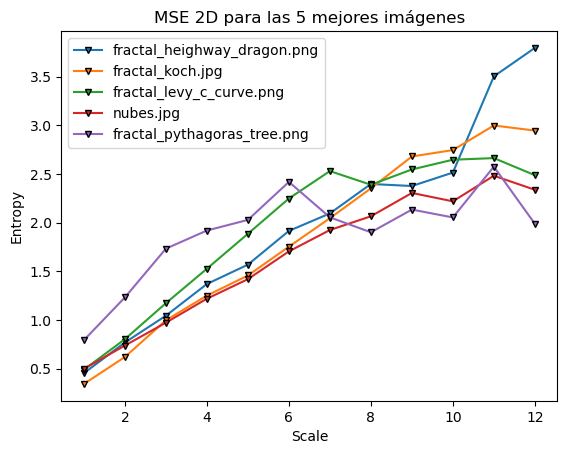

In [31]:
# Graficamos las MSE de las 5 mejores imágenes en un solo gráfico
for filename in best_images['Image']:
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    mse_values = list_mse[list_images.index(filename)]
    
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='v', markersize=5, markeredgecolor='black', label=filename)

plt.title('MSE 2D para las 5 mejores imágenes')
plt.xlabel('Scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()

#### 2) Área:

In [35]:
best_images = df_mse_values.sort_values(by='Area', ascending=False).head(5)
best_images

Image       Area         1         2         3  \
17     fractal_levy_c_curve.png  21.902515  0.490007  0.803127  1.173152   
11       fractal_cantor_set.jpg  21.729776  1.522930  1.600347  1.707998   
13  fractal_heighway_dragon.png  21.678659  0.454081  0.769100  1.044116   
20  fractal_pythagoras_tree.png  21.442935  0.793339  1.232586  1.733245   
16             fractal_koch.jpg  20.545763  0.343008  0.620032  0.997216   

           4         5         6         7         8         9        10  \
17  1.526873  1.885953  2.248280  2.530053  2.389427  2.546629  2.646585   
11  2.270253  2.122912  1.662449  2.083196  1.986820  2.150208  2.448978   
13  1.369984  1.568630  1.915403  2.094904  2.397534  2.376545  2.514540   
20  1.919316  2.028480  2.418842  2.054674  1.901199  2.134377  2.053666   
16  1.250708  1.457119  1.753455  2.045711  2.352589  2.679923  2.745863   

          11        12  
17  2.663528  2.487809  
11  1.598799  2.672702  
13  3.503077  3.795570  
20  2.575562  1.988637  
16  2.998413  2.946461

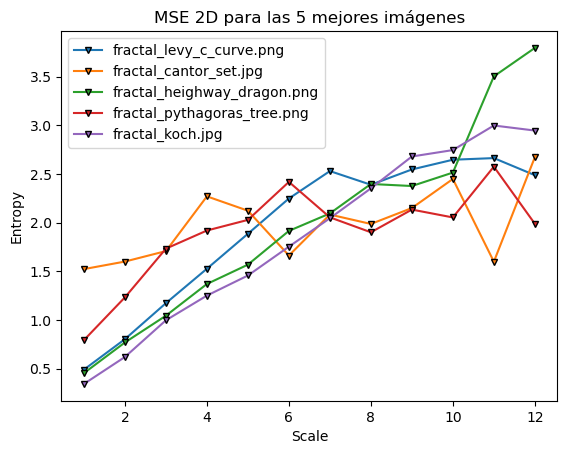

In [36]:
# Graficamos las MSE de las 5 mejores imágenes en un solo gráfico
for filename in best_images['Image']:
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    mse_values = list_mse[list_images.index(filename)]
    
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='v', markersize=5, markeredgecolor='black', label=filename)

plt.title('MSE 2D para las 5 mejores imágenes')
plt.xlabel('Scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()

### II- Ahora, realizamos el mismo procedimiento anterior, pero sin Fuzzy Entropy:

In [40]:
list_mse = []
list_images = []
list_areas = []

In [41]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    mse_values = mse_2D_one_image(file_path, scales, m, r)
    area = np.trapz(mse_values, dx=1)

    list_mse.append(mse_values)
    list_images.append(filename)
    list_areas.append(area)

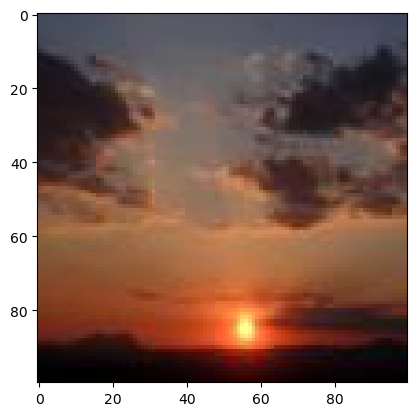

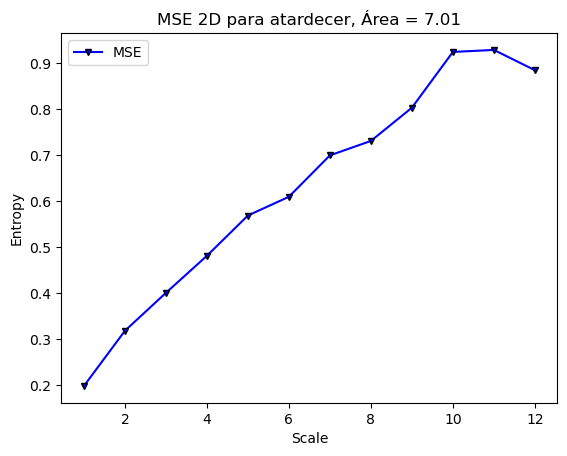

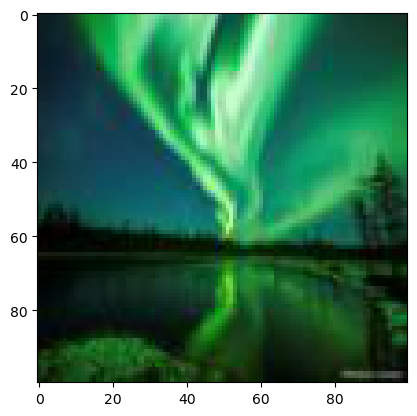

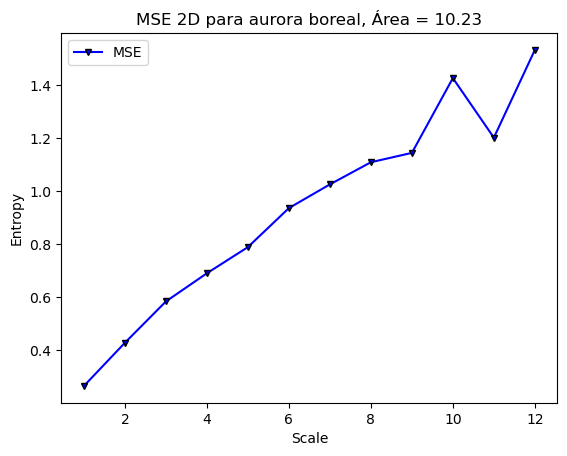

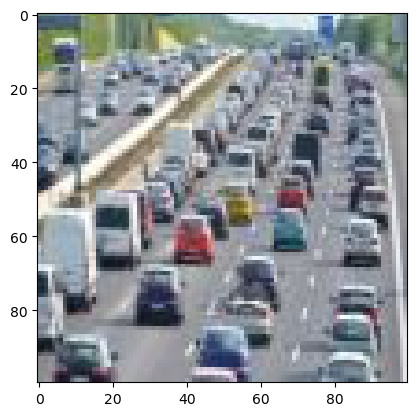

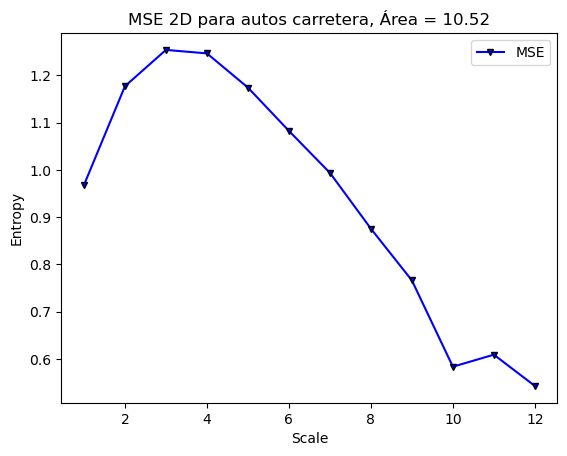

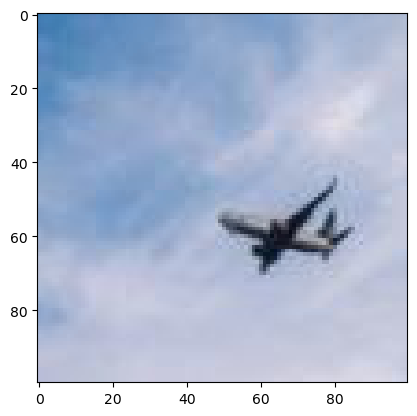

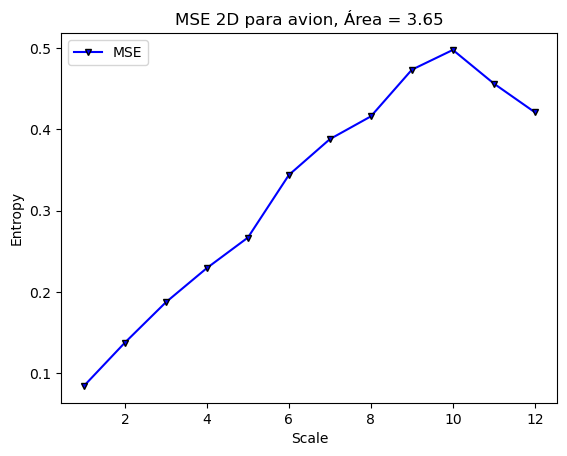

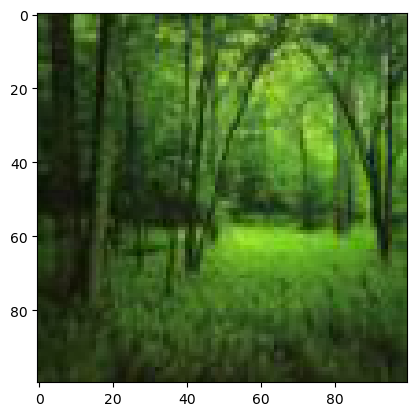

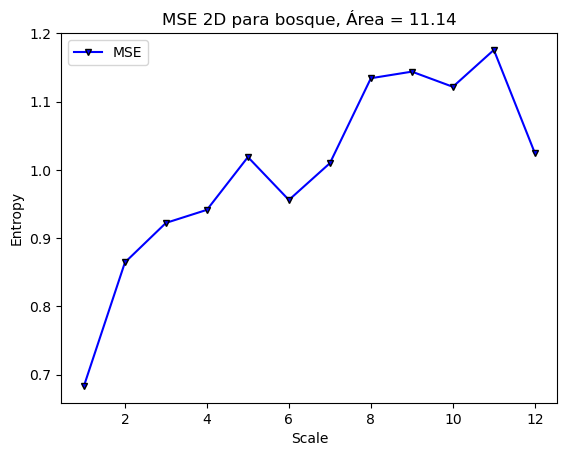

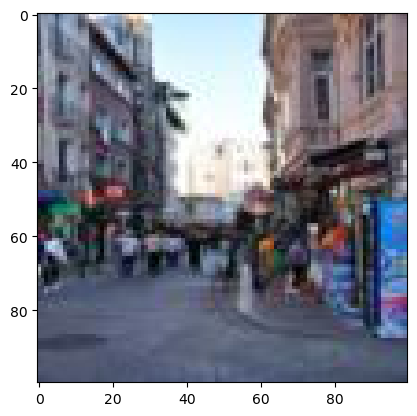

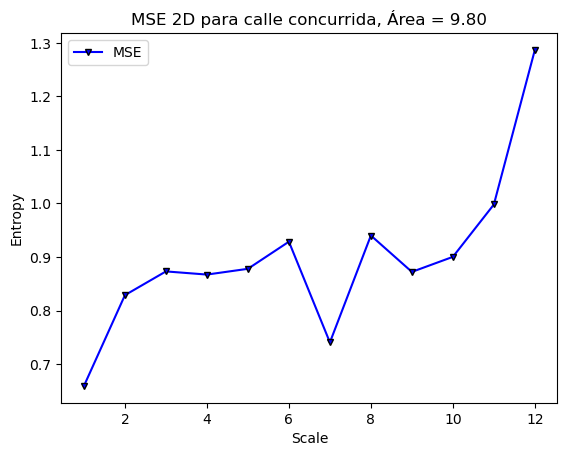

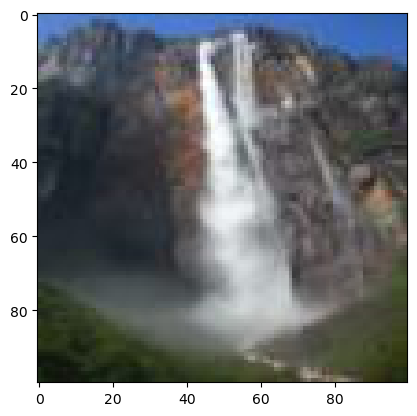

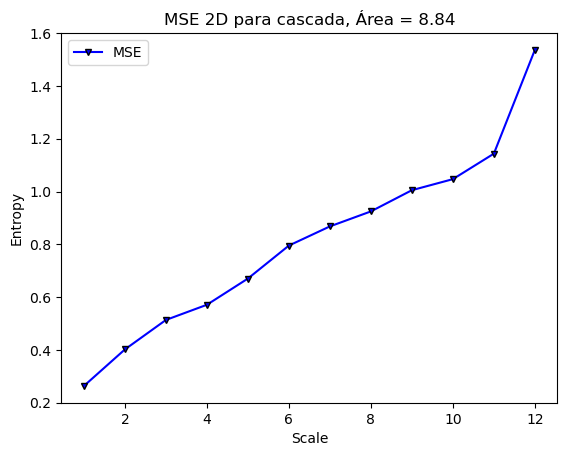

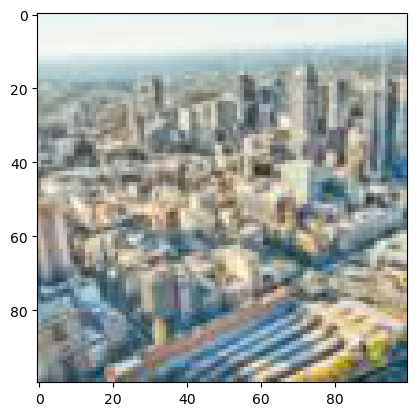

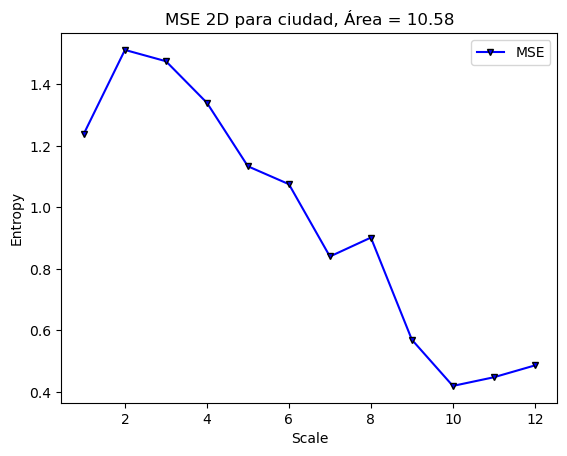

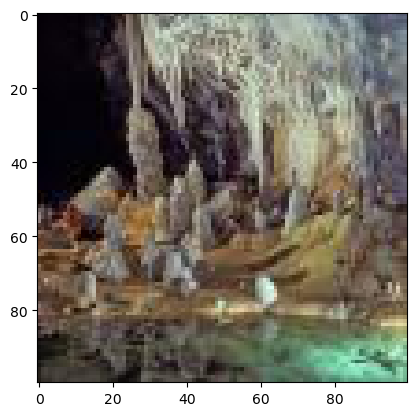

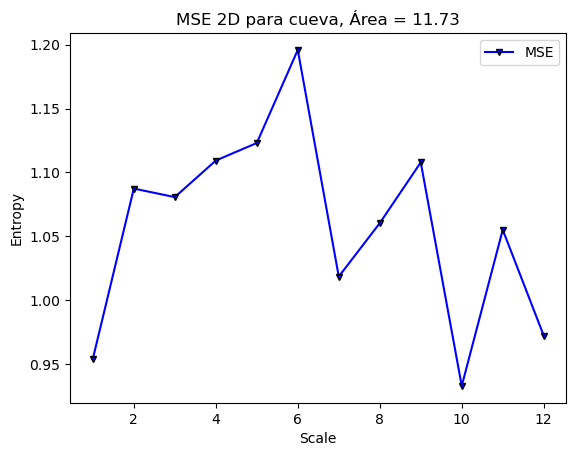

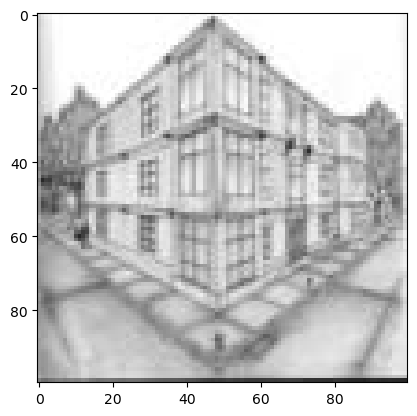

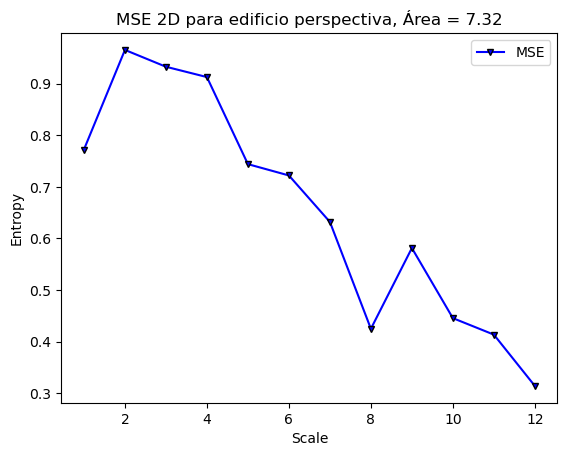

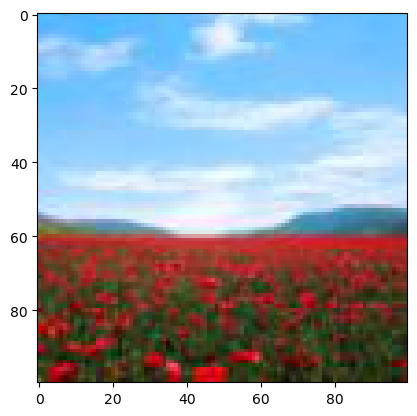

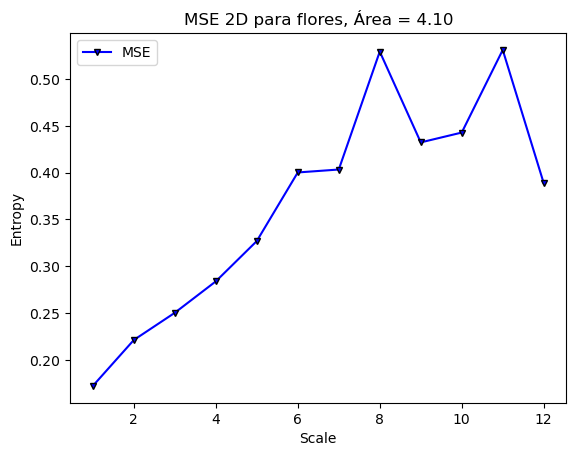

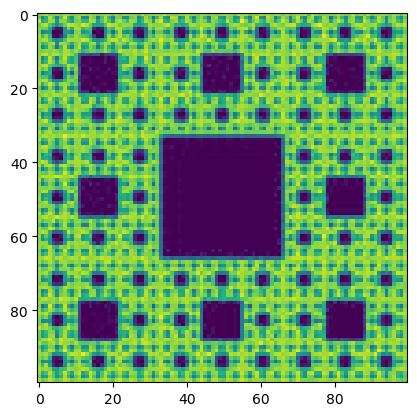

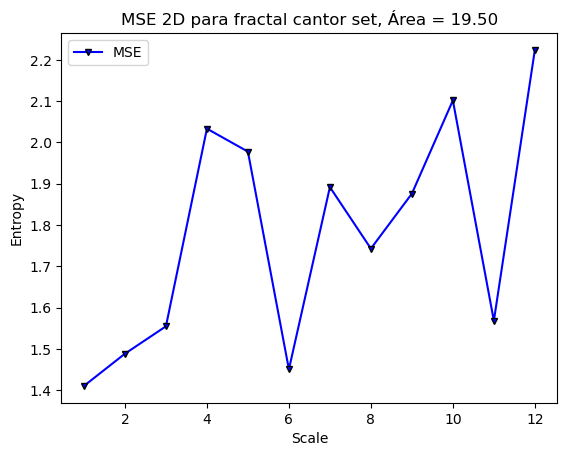

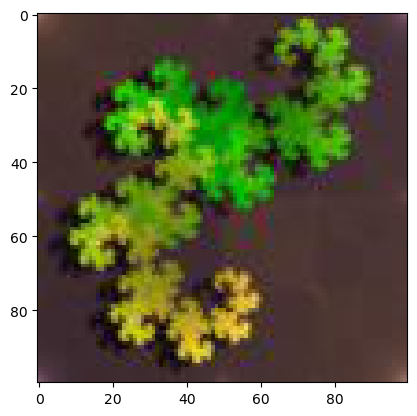

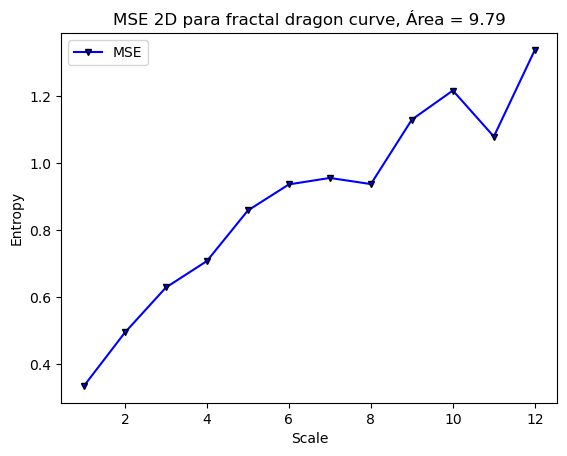

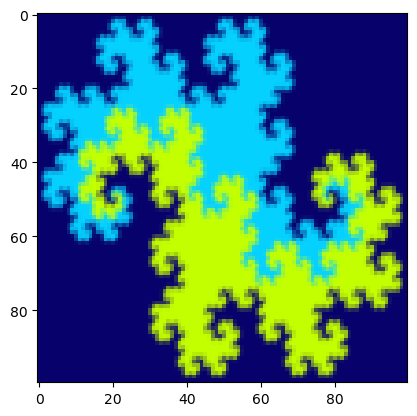

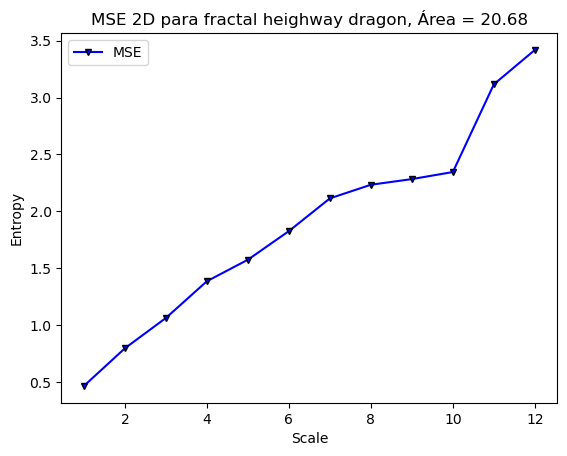

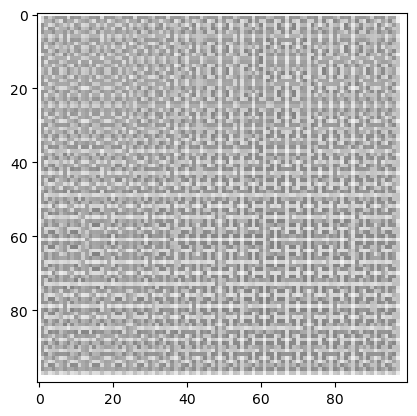

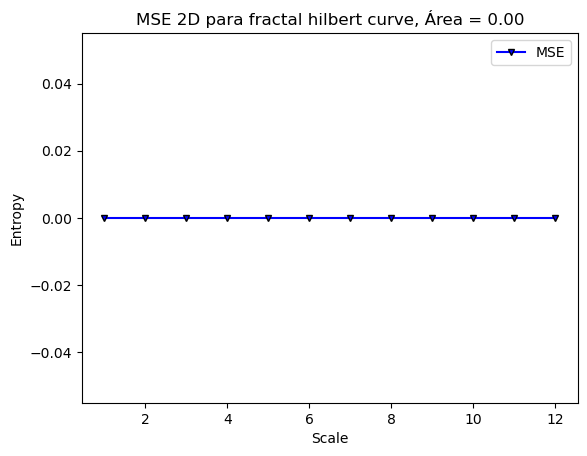

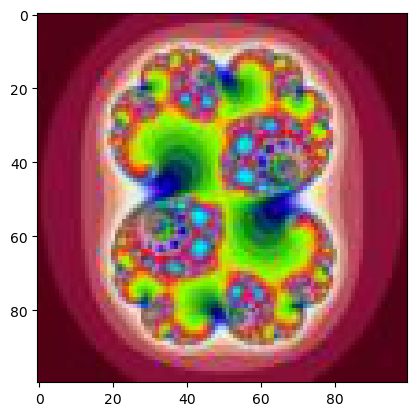

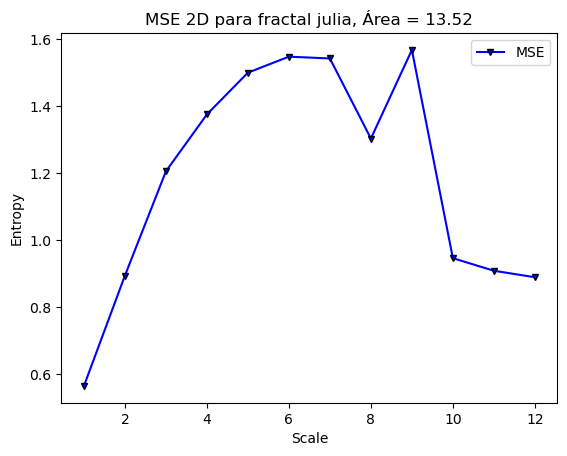

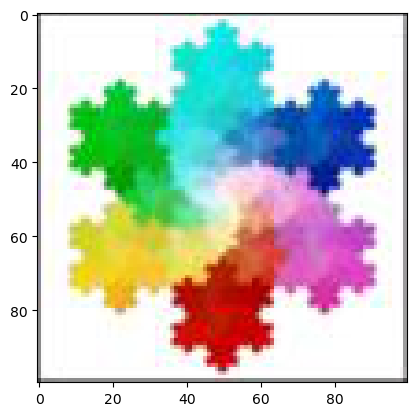

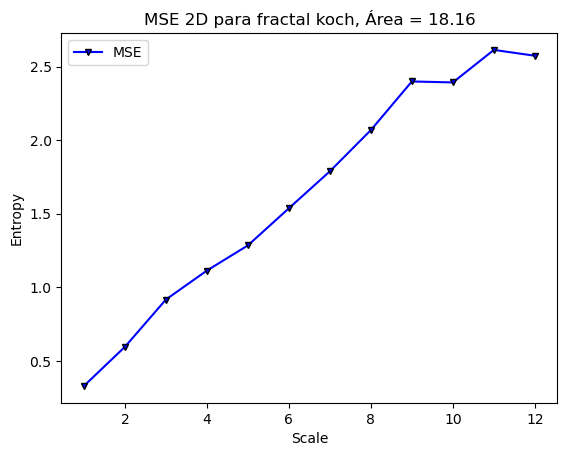

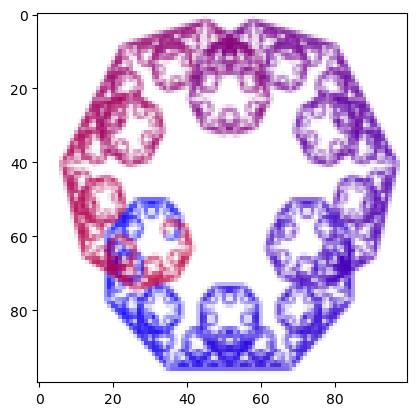

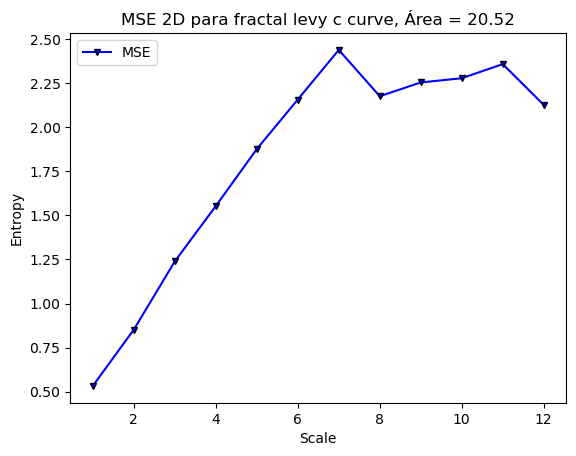

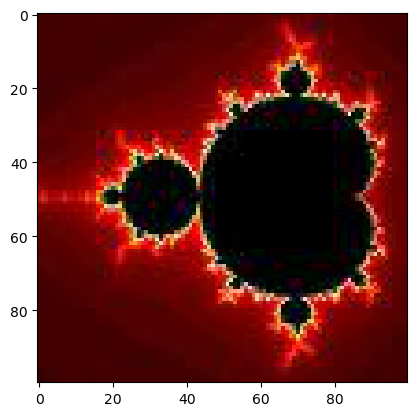

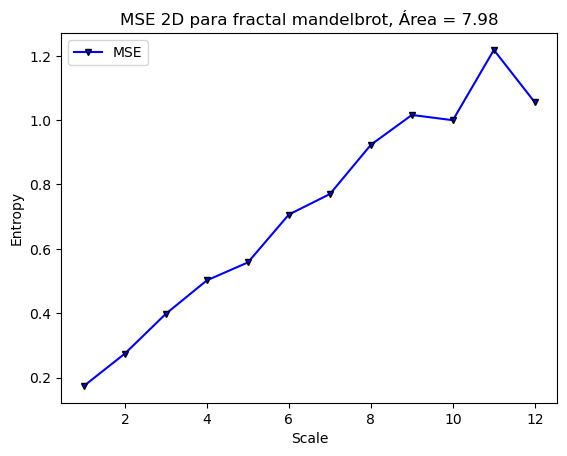

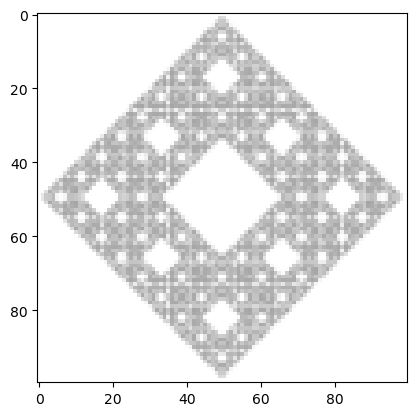

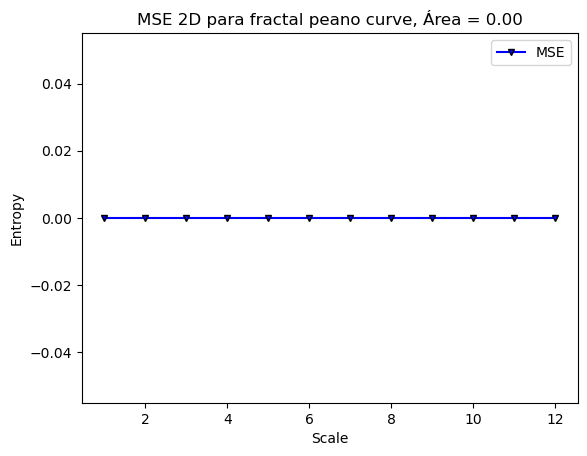

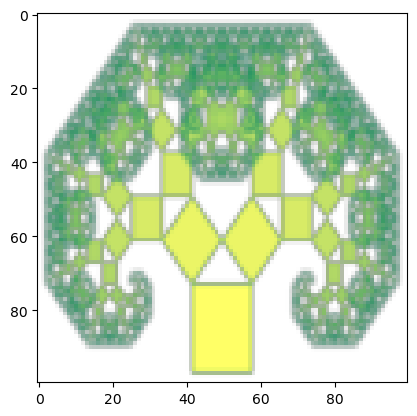

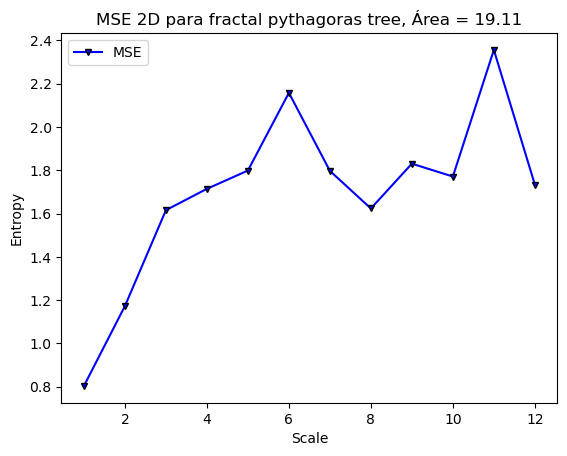

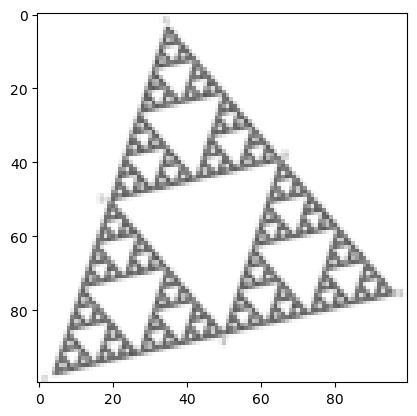

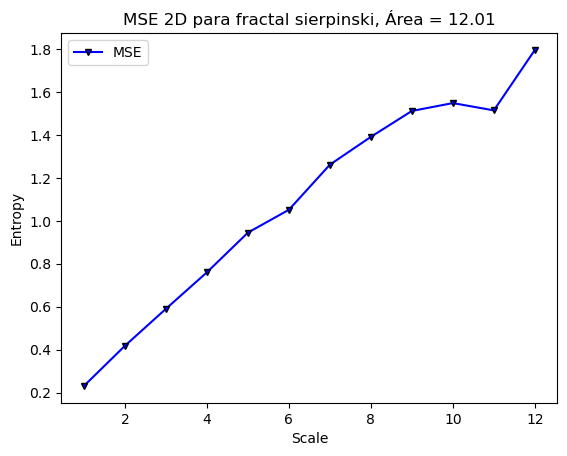

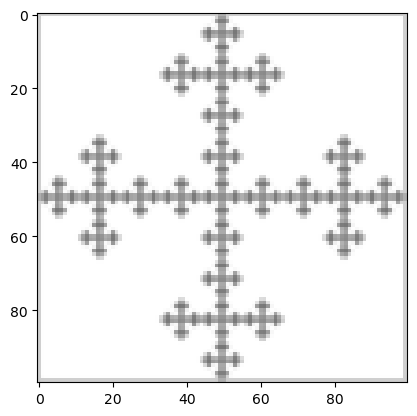

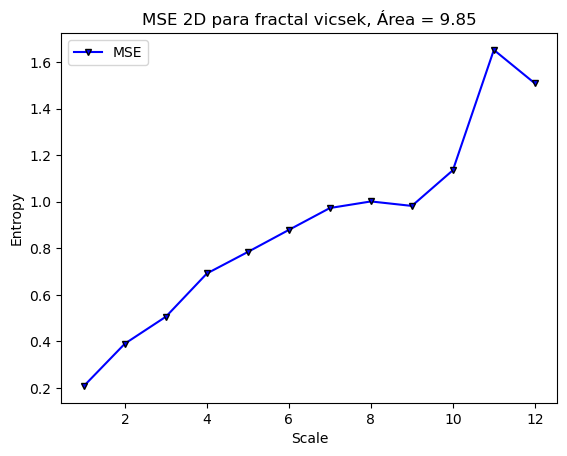

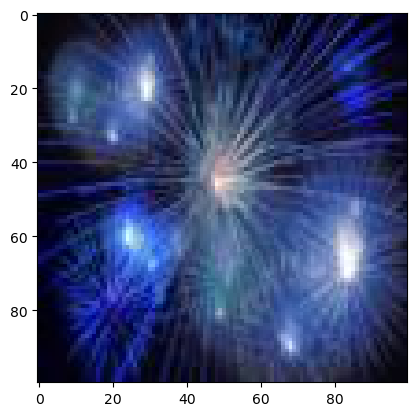

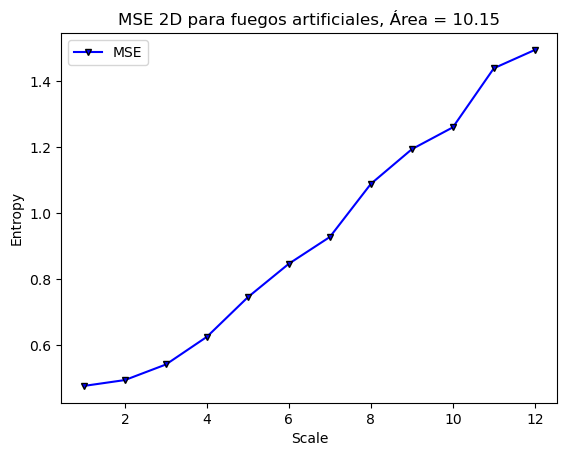

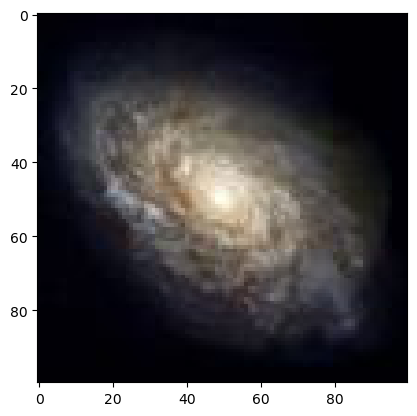

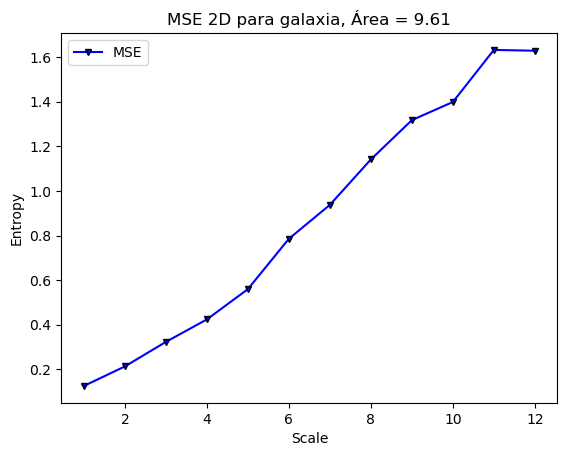

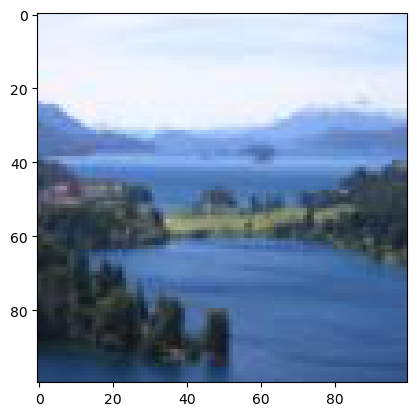

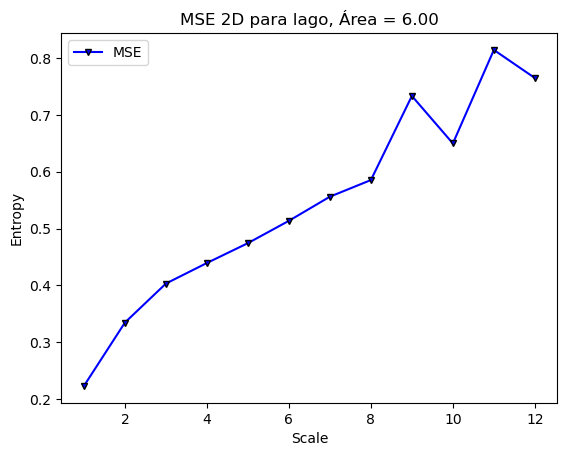

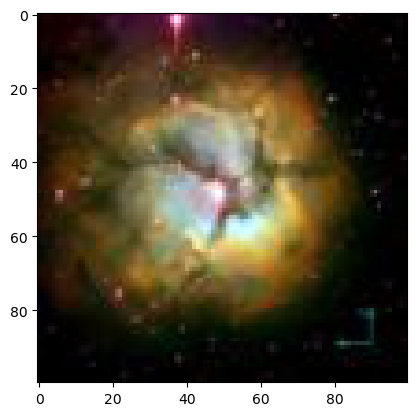

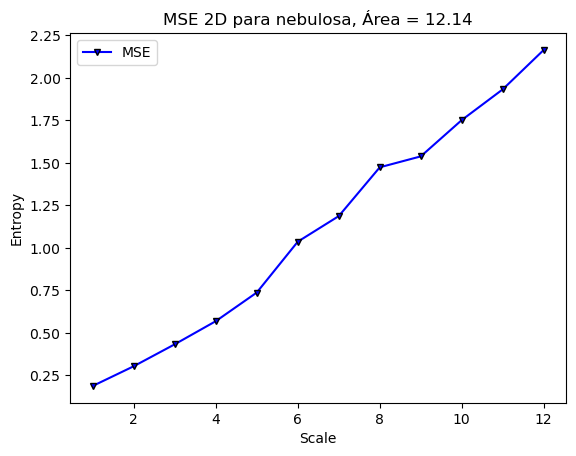

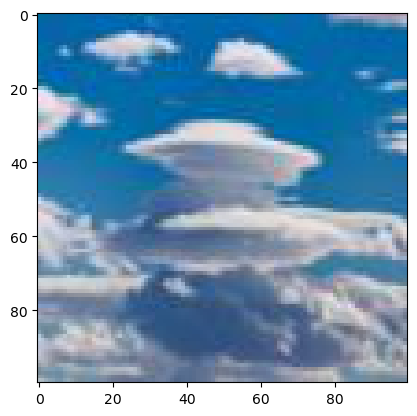

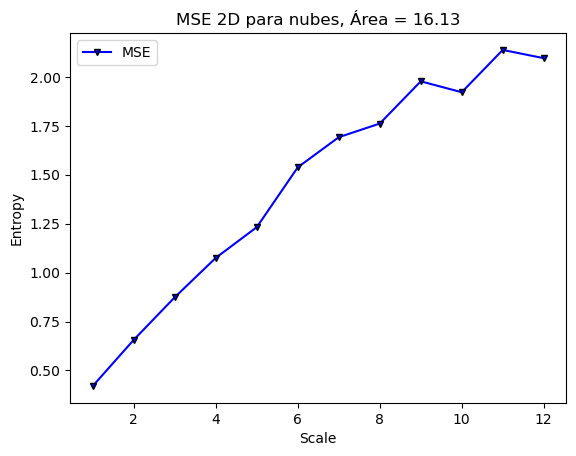

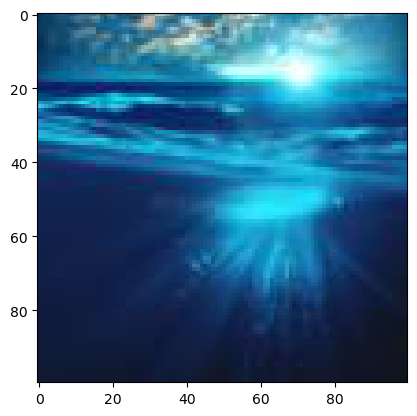

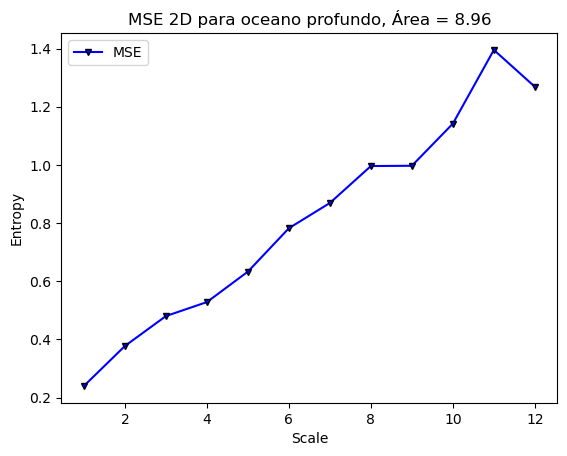

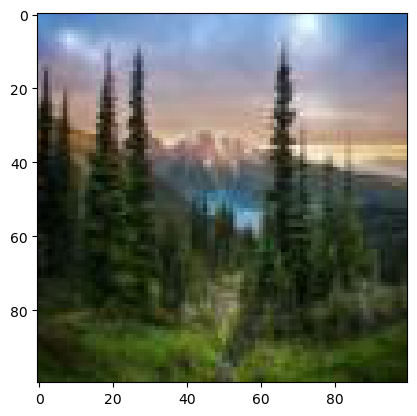

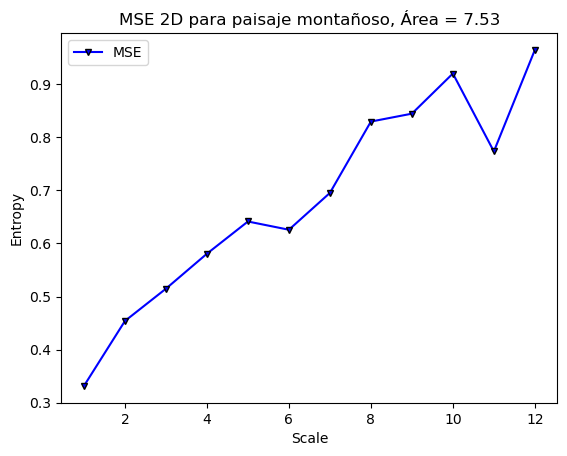

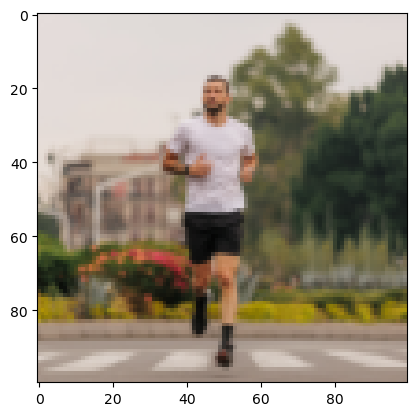

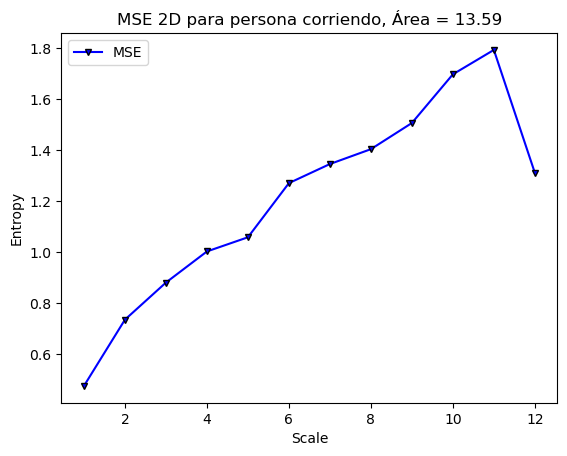

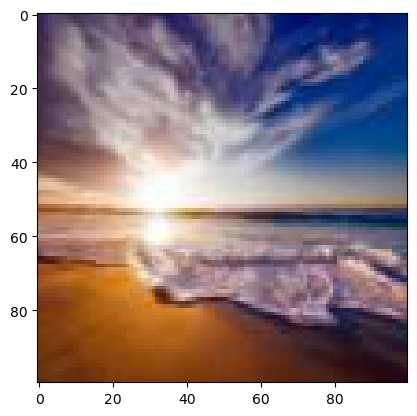

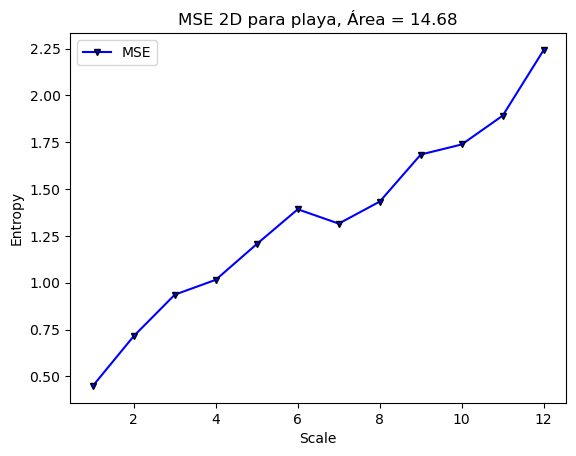

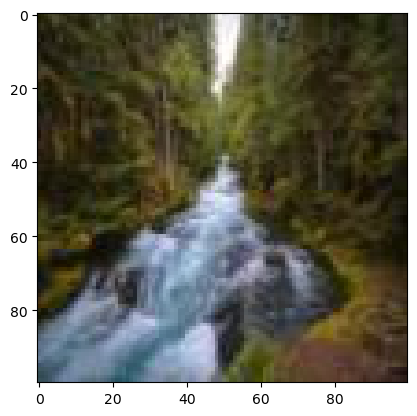

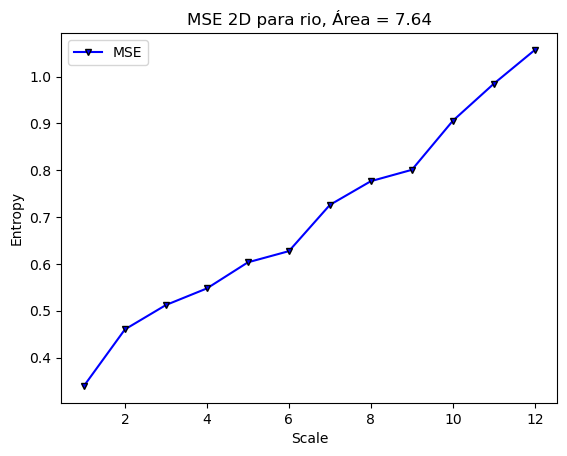

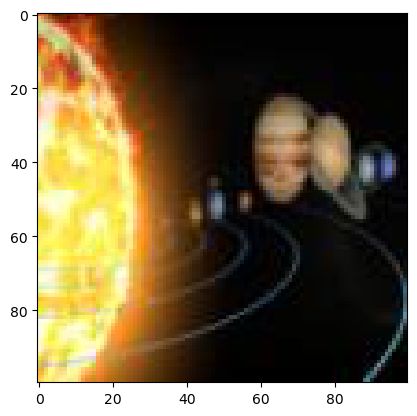

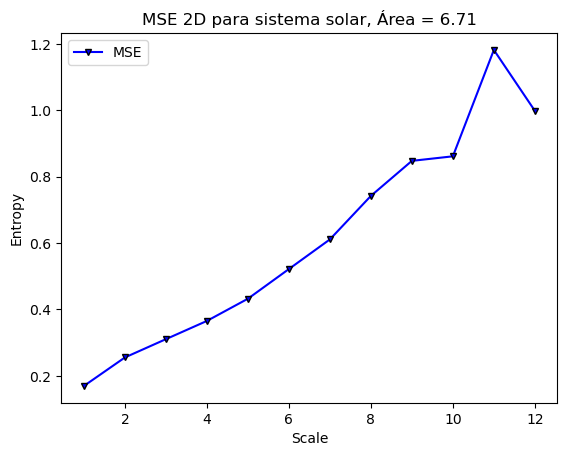

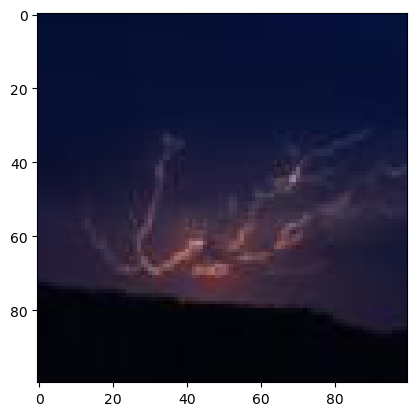

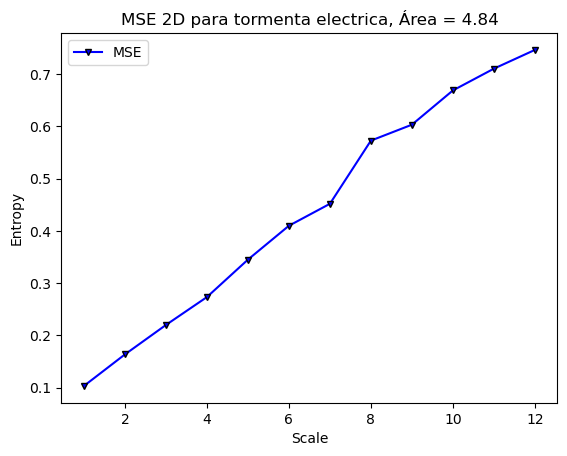

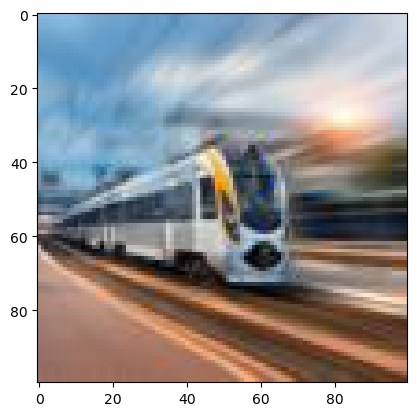

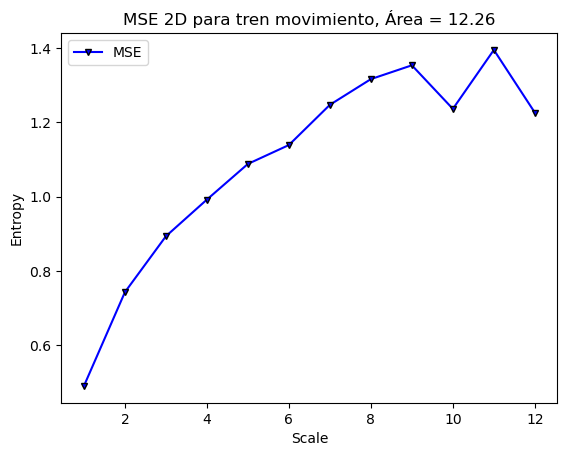

In [44]:
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    area = list_areas[list_images.index(filename)]
    mse_values = list_mse[list_images.index(filename)]
    
    plt.imshow(image)
    plt.show()

    plt.plot(range(1, len(mse_values) + 1), mse_values, color='blue', marker='v', markersize=5, markeredgecolor='black', label='MSE')

    name_title = filename.replace('.jpg', '')
    name_title = name_title.replace('.png', '')
    name_title = name_title.replace('.jpeg', '')
    name_title = name_title.replace('_', ' ')
    plt.title(f'MSE 2D para {name_title}, Área = {area:.2f}')

    plt.xlabel('Scale')
    plt.ylabel('Entropy')
    plt.legend()
    plt.show()

In [45]:
data_dict = {'Image': list_images, 'Area': list_areas, '1': [], '2': [], '3': [], '4': [], '5': [], '6': [], '7': [], '8': [], '9': [], '10': [], '11': [], '12': []}

for i in range(len(list_mse)):
    for j in range(len(list_mse[i])):
        data_dict[str(j + 1)].append(list_mse[i][j])

df_mse_values_2 = pd.DataFrame(data_dict)
df_mse_values_2.to_csv(r'datos\2D\mse_values_2.csv', index=False)
df_mse_values_2

Image       Area         1         2         3  \
0                atardecer.jpeg   7.008496  0.198160  0.318136  0.400695   
1             aurora_boreal.jpg  10.232299  0.265556  0.428341  0.584067   
2           autos_carretera.jpg  10.516834  0.967807  1.176856  1.253630   
3                     avion.jpg   3.648963  0.084489  0.137767  0.187395   
4                    bosque.jpg  11.141177  0.683292  0.864297  0.922175   
5          calle_concurrida.jpg   9.799976  0.659227  0.828774  0.873112   
6                   cascada.jpg   8.840940  0.263512  0.401937  0.513547   
7                    ciudad.jpg  10.576812  1.239821  1.511594  1.474860   
8                     cueva.jpg  11.734124  0.954066  1.087367  1.080678   
9      edificio_perspectiva.jpg   7.317471  0.772310  0.965389  0.932775   
10                   flores.jpg   4.102222  0.172071  0.221159  0.250265   
11       fractal_cantor_set.jpg  19.501395  1.410125  1.488171  1.554533   
12     fractal_dragon_curve.jpg   9.789111  0.335986  0.495352  0.629605   
13  fractal_heighway_dragon.png  20.680557  0.465116  0.796159  1.062810   
14    fractal_hilbert_curve.png   0.000000 -0.000000 -0.000000 -0.000000   
15            fractal_julia.jpg  13.517044  0.563950  0.893751  1.205379   
16             fractal_koch.jpg  18.158079  0.329489  0.595298  0.916615   
17     fractal_levy_c_curve.png  20.517162  0.532262  0.851805  1.239091   
18       fractal_mandelbrot.jpg   7.981924  0.173915  0.274520  0.398305   
19      fractal_peano_curve.png   0.000000 -0.000000 -0.000000 -0.000000   
20  fractal_pythagoras_tree.png  19.106747  0.803323  1.172667  1.615755   
21       fractal_sierpinski.png  12.008434  0.230811  0.417833  0.590178   
22           fractal_vicsek.png   9.851633  0.208619  0.390403  0.506069   
23      fuegos_artificiales.jpg  10.154780  0.477167  0.494958  0.542108   
24                  galaxia.jpg   9.608845  0.125764  0.213305  0.323305   
25                     lago.jpg   5.997984  0.223290  0.334733  0.403306   
26                 nebulosa.jpg  12.140365  0.188571  0.304488  0.433514   
27                    nubes.jpg  16.127193  0.420925  0.656807  0.874287   
28          oceano_profundo.jpg   8.957486  0.240334  0.377664  0.480498   
29        paisaje_montañoso.jpg   7.527423  0.331564  0.453924  0.514737   
30        persona_corriendo.png  13.587938  0.476082  0.735718  0.881042   
31                    playa.jpg  14.679504  0.449339  0.715727  0.936580   
32                      rio.jpg   7.642227  0.339364  0.460107  0.512140   
33            sistema_solar.jpg   6.711300  0.169483  0.255275  0.310367   
34       tormenta_electrica.jpg   4.843298  0.103264  0.163592  0.219931   
35          tren_movimiento.jpg  12.262670  0.490812  0.743210  0.893588   

           4         5         6         7         8         9        10  \
0   0.481293  0.568893  0.609711  0.699712  0.731148  0.803415  0.924733   
1   0.690338  0.788917  0.935940  1.025338  1.108822  1.144087  1.426077   
2   1.246312  1.173996  1.082438  0.993693  0.875608  0.766157  0.583644   
3   0.229453  0.266891  0.343878  0.387925  0.415895  0.473267  0.497572   
4   0.941327  1.018673  0.955801  1.009703  1.134199  1.143832  1.121607   
5   0.867204  0.877966  0.928627  0.740545  0.940148  0.872197  0.900297   
6   0.571053  0.670383  0.795379  0.867966  0.924794  1.005161  1.047011   
7   1.339714  1.133377  1.075243  0.840241  0.901687  0.569723  0.419601   
8   1.109298  1.123009  1.195859  1.018508  1.060319  1.107849  0.932936   
9   0.912752  0.743992  0.722045  0.632028  0.424867  0.581369  0.445501   
10  0.283826  0.326941  0.400262  0.403392  0.529435  0.432383  0.442906   
11  2.033409  1.977700  1.450259  1.891745  1.742784  1.875936  2.101797   
12  0.708546  0.859415  0.937148  0.956393  0.938093  1.130480  1.217146   
13  1.385642  1.574657  1.826310  2.113846  2.233629  2.283391  2.345462   
14 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 

#### 1) Función de pesos:

In [46]:
weights = [0.35, 0.15, 0.25, 0.25]
df_score_2 = pd.DataFrame(columns=['Image', 'Score'])
count = 0

for entropy_values_image in list_mse:
    score = image_score(entropy_values_image, weights)
    df_score_2.loc[count] = [list_images[count], score]
    count += 1

df_score_2.to_csv(r'datos\2D\score_2.csv', index=False)
df_score_2

<ipython-input-27-1a9dc64d508b>:6: RuntimeWarning: invalid value encountered in double_scalars
  entropy_stability = np.sum(np.abs(scale_entropy - np.mean(scale_entropy))) / np.sum(scale_entropy)
<ipython-input-27-1a9dc64d508b>:6: RuntimeWarning: invalid value encountered in double_scalars
  entropy_stability = np.sum(np.abs(scale_entropy - np.mean(scale_entropy))) / np.sum(scale_entropy)


Image     Score
0                atardecer.jpeg  0.621016
1             aurora_boreal.jpg  0.939727
2           autos_carretera.jpg  0.652496
3                     avion.jpg  0.383935
4                    bosque.jpg  0.667495
5          calle_concurrida.jpg  0.632381
6                   cascada.jpg  0.844398
7                    ciudad.jpg  0.759405
8                     cueva.jpg  0.590092
9      edificio_perspectiva.jpg  0.530086
10                   flores.jpg  0.349293
11       fractal_cantor_set.jpg  1.174461
12     fractal_dragon_curve.jpg  0.808886
13  fractal_heighway_dragon.png  1.842930
14    fractal_hilbert_curve.png       NaN
15            fractal_julia.jpg  0.869220
16             fractal_koch.jpg  1.604296
17     fractal_levy_c_curve.png  1.526897
18       fractal_mandelbrot.jpg  0.759801
19      fractal_peano_curve.png       NaN
20  fractal_pythagoras_tree.png  1.286875
21       fractal_sierpinski.png  1.100172
22           fractal_vicsek.png  0.931878
23      fuegos_artificiales.jpg  0.850911
24                  galaxia.jpg  1.026181
25                     lago.jpg  0.500535
26                 nebulosa.jpg  1.272190
27                    nubes.jpg  1.310502
28          oceano_profundo.jpg  0.836706
29        paisaje_montañoso.jpg  0.592206
30        persona_corriendo.png  1.070982
31                    playa.jpg  1.250711
32                      rio.jpg  0.623254
33            sistema_solar.jpg  0.704172
34       tormenta_electrica.jpg  0.520946
35          tren_movimiento.jpg  0.842125

In [47]:
best_images = df_score_2.sort_values(by='Score', ascending=False).head(5)
best_images

Image     Score
13  fractal_heighway_dragon.png  1.842930
16             fractal_koch.jpg  1.604296
17     fractal_levy_c_curve.png  1.526897
27                    nubes.jpg  1.310502
20  fractal_pythagoras_tree.png  1.286875

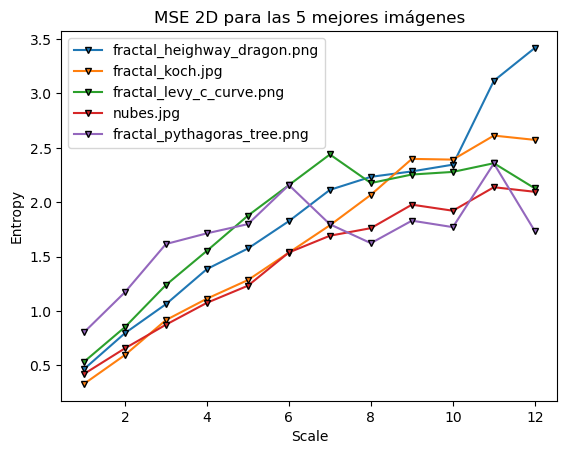

In [48]:
# Graficamos las MSE de las 5 mejores imágenes en un solo gráfico
for filename in best_images['Image']:
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    mse_values = list_mse[list_images.index(filename)]
    
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='v', markersize=5, markeredgecolor='black', label=filename)
    
plt.title('MSE 2D para las 5 mejores imágenes')
plt.xlabel('Scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()

#### 2) Área:

In [49]:
best_images = df_mse_values_2.sort_values(by='Area', ascending=False).head(5)
best_images

Image       Area         1         2         3  \
13  fractal_heighway_dragon.png  20.680557  0.465116  0.796159  1.062810   
17     fractal_levy_c_curve.png  20.517162  0.532262  0.851805  1.239091   
11       fractal_cantor_set.jpg  19.501395  1.410125  1.488171  1.554533   
20  fractal_pythagoras_tree.png  19.106747  0.803323  1.172667  1.615755   
16             fractal_koch.jpg  18.158079  0.329489  0.595298  0.916615   

           4         5         6         7         8         9        10  \
13  1.385642  1.574657  1.826310  2.113846  2.233629  2.283391  2.345462   
17  1.553472  1.876712  2.157902  2.439426  2.176551  2.254799  2.278828   
11  2.033409  1.977700  1.450259  1.891745  1.742784  1.875936  2.101797   
20  1.714283  1.798778  2.158019  1.797211  1.623447  1.830569  1.771055   
16  1.113451  1.284523  1.536842  1.788200  2.068354  2.398588  2.391949   

          11        12  
13  3.116644  3.418897  
17  2.358755  2.127381  
11  1.567936  2.224125  
20  2.356301  1.734001  
16  2.612855  2.573318

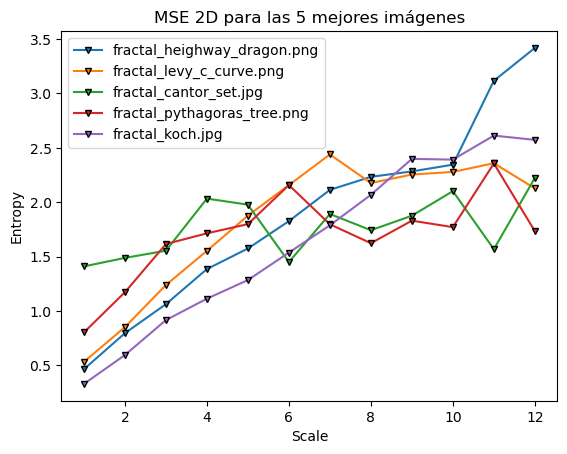

In [50]:
# Graficamos las MSE de las 5 mejores imágenes en un solo gráfico
for filename in best_images['Image']:
    file_path = os.path.join(folder_path, filename)
    image = io.imread(file_path)
    
    mse_values = list_mse[list_images.index(filename)]
    
    plt.plot(range(1, len(mse_values) + 1), mse_values, marker='v', markersize=5, markeredgecolor='black', label=filename)

plt.title('MSE 2D para las 5 mejores imágenes')
plt.xlabel('Scale')
plt.ylabel('Entropy')
plt.legend()
plt.show()